### 나라별 생활 수준 및 습관에 따른 기대수명


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
 
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

### 데이터 로드 및 가져온 데이터 값 확인

In [24]:
df = pd.read_csv('./../data/Life-Expectancy-Data-Averaged.csv')
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


### 데이터 확인 및 결측치 탐색
- 확인 결과 따로 결측치는 존재하지 않았다.

In [25]:
# 사용할 컬럼
columns_to_keep = [
    "Country",
    "Region",
    "Adult_mortality",
    "Alcohol_consumption",
    "BMI",
    "Schooling",
    "Economy_status",
    "Life_expectancy",
]

new_df = df[columns_to_keep]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              179 non-null    object 
 1   Region               179 non-null    object 
 2   Adult_mortality      179 non-null    float64
 3   Alcohol_consumption  179 non-null    float64
 4   BMI                  179 non-null    float64
 5   Schooling            179 non-null    float64
 6   Economy_status       179 non-null    float64
 7   Life_expectancy      179 non-null    float64
dtypes: float64(6), object(2)
memory usage: 11.3+ KB


### 이상치 확인
- 확인 결과 내가 사용할 컬럼들에는 성인 사망률과 알코올 섭취량, 예상 수명에 이상치가 존재한다.
    - 하지만 이들은 모두 사망자 수, 알코올 섭취량, 평균 수명의 각 나라별  ***정확한 데이터***이기에 값들을 조정하지않고 사용하기로 결정했다. 

In [26]:
new_df.describe()

,Adult_mortality,Alcohol_consumption,BMI,Schooling,Economy_status,Life_expectancy
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,192.251775,4.820882,25.032926,7.632123,0.793296,68.856075
std,111.659044,3.914554,2.165490,3.126912,0.406077,9.197699
min,57.710313,0.000025,20.212500,1.337500,0.000000,45.606250
25%,107.046906,1.317813,23.225000,4.946875,1.000000,62.303125
50%,164.432406,4.209375,25.650000,7.831250,1.000000,71.506250
75%,247.523922,7.843438,26.425000,10.365625,1.000000,74.937500
max,572.974312,15.100000,31.687500,13.268750,1.000000,82.456250


C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\4163535259.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


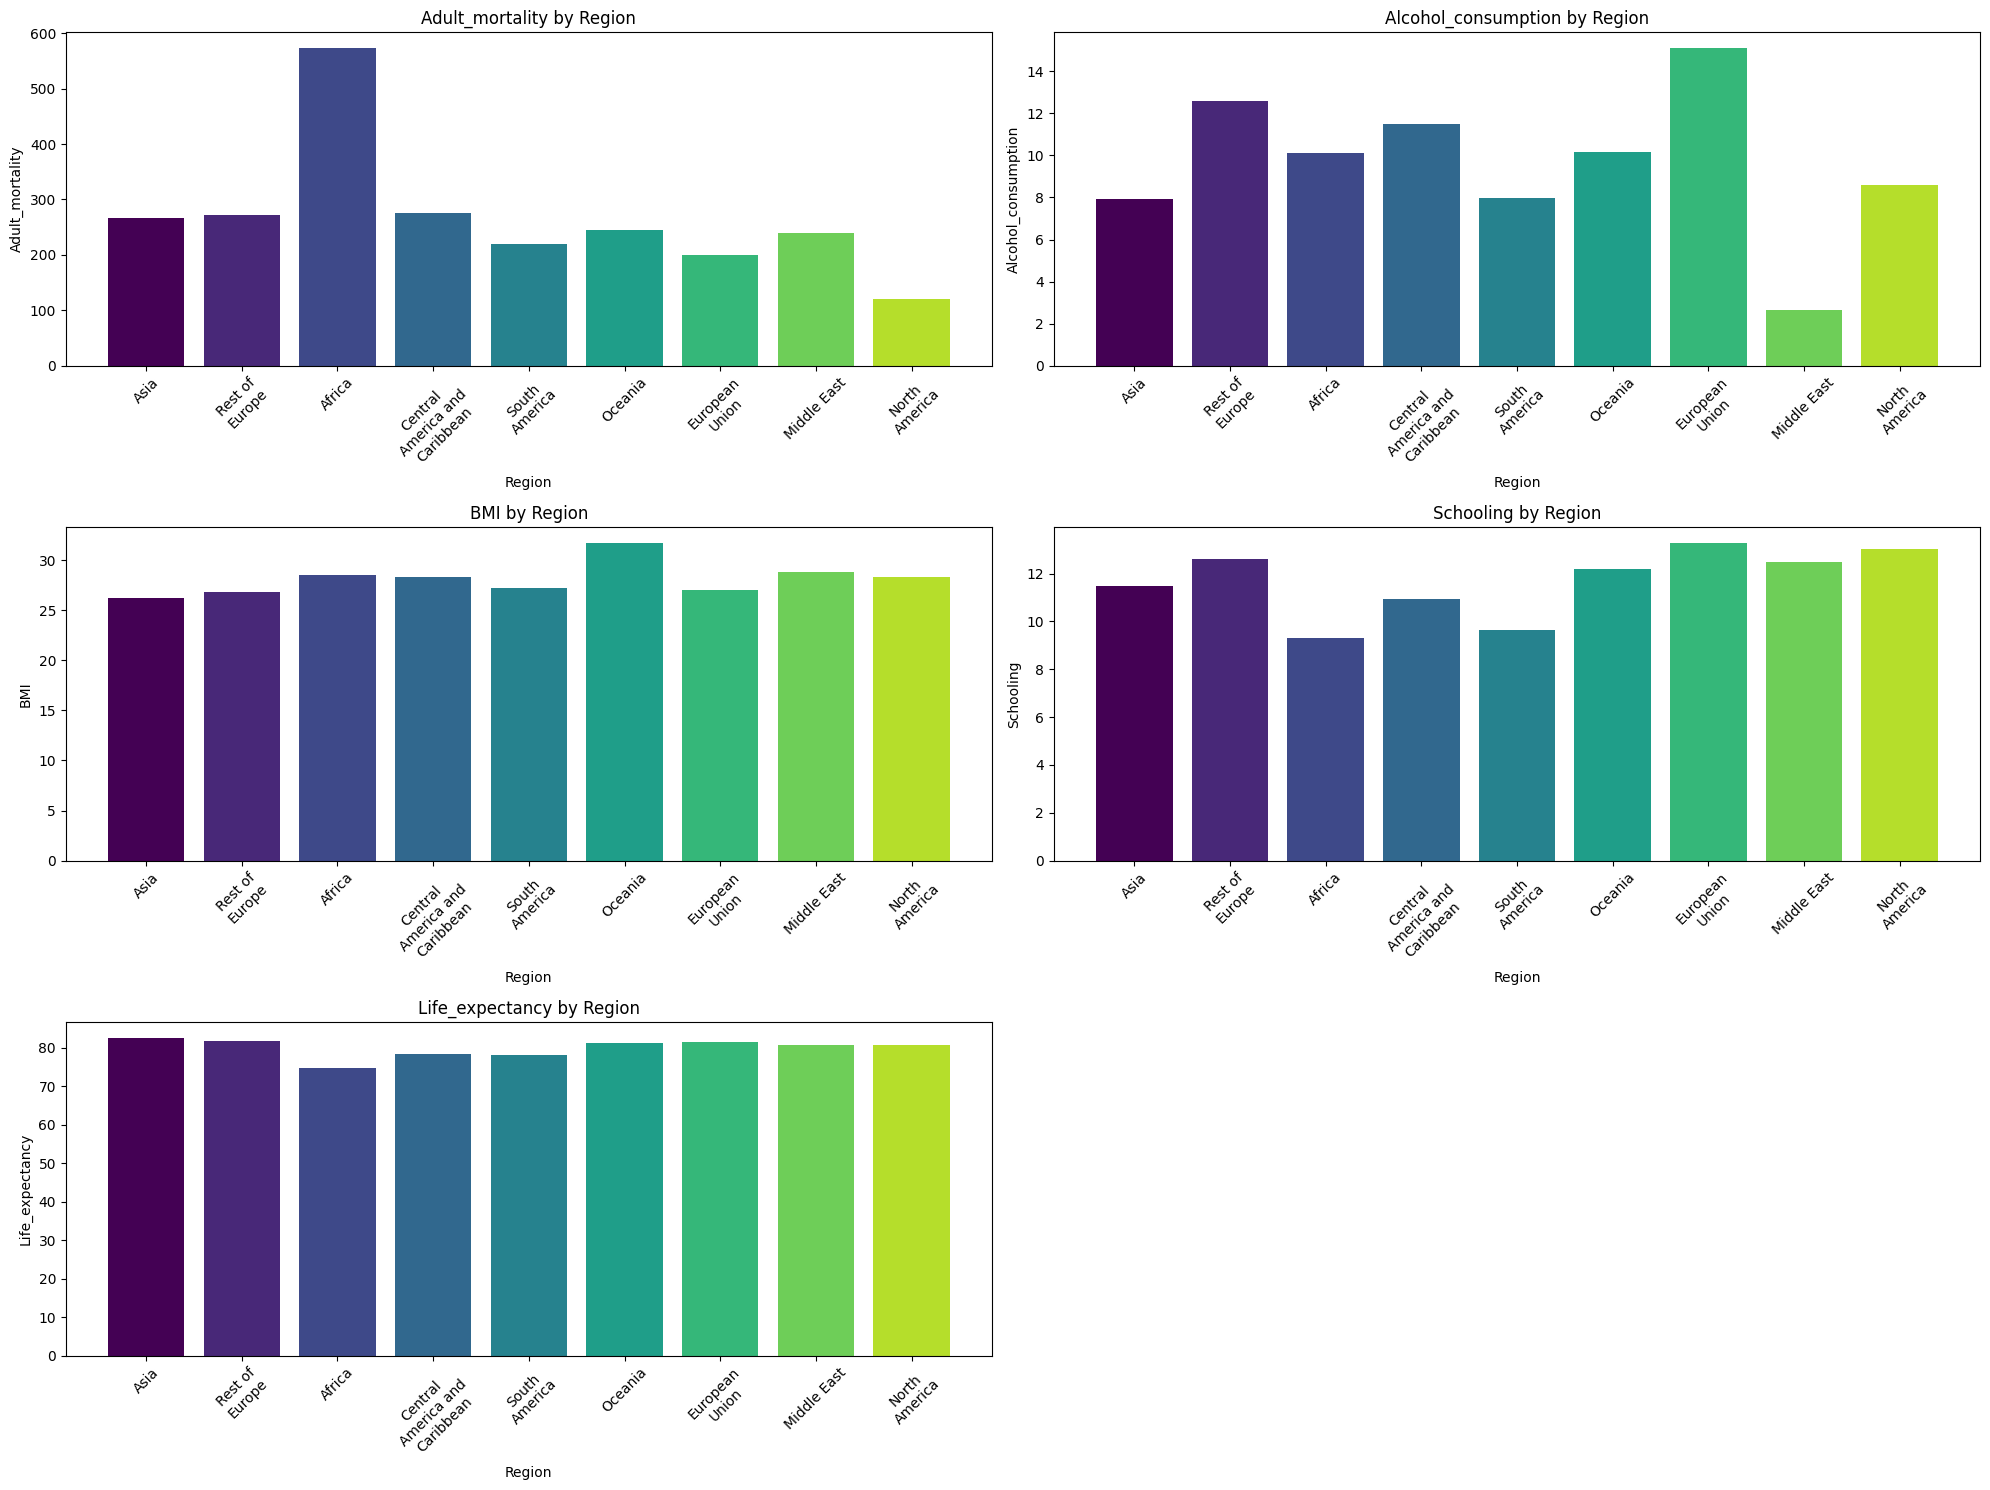

In [27]:
import matplotlib.pyplot as plt
import textwrap
import matplotlib.cm as cm

columns_to_plot = [
    "Adult_mortality",
    "Alcohol_consumption",
    "BMI",
    "Schooling",
    "Life_expectancy",
]

# 4x4 서브플롯 설정
plt.figure(figsize=(20, 15))

# 컬러맵 설정
cmap = cm.get_cmap('viridis')

# Region별 고유 값 가져오기
unique_regions = df["Region"].unique()
region_to_color = {region: cmap(i / len(unique_regions)) for i, region in enumerate(unique_regions)}


# 그래프 생성 (대륙별)
for i, column in enumerate(columns_to_plot, 1):
    ax = plt.subplot(3, 2, i)  # 4x4 그리드, i번째 서브플롯
 
    # 각 Region의 색상 설정
    bar_colors = [region_to_color[region] for region in df["Region"]]
    
    ax.bar(df["Region"], df[column], color=bar_colors)  # 막대 그래프
    ax.set_title(f"{column} by Region")  # 제목
    ax.set_xlabel("Region")  # X축 라벨
    ax.set_ylabel(column)  # Y축 라벨

    # X축 레이블이 길면 2줄로 나누기
    labels = ax.get_xticklabels()  # X축 레이블 가져오기
    ticks = ax.get_xticks()  # X축 레이블 위치 가져오기
    new_labels = []
    for label in labels:
        if len(label.get_text()) > 12:
            # 12자 이상이면 2줄로 나누기
            wrapped_label = textwrap.fill(label.get_text(), 12)
            new_labels.append(wrapped_label)
        else:
            new_labels.append(label.get_text())

    ax.set_xticks(ticks)  # X축 위치 설정
    ax.set_xticklabels(new_labels, rotation=45)  # 회전 후 레이블 설정

    plt.tight_layout()  # 레이아웃 조정



plt.show()


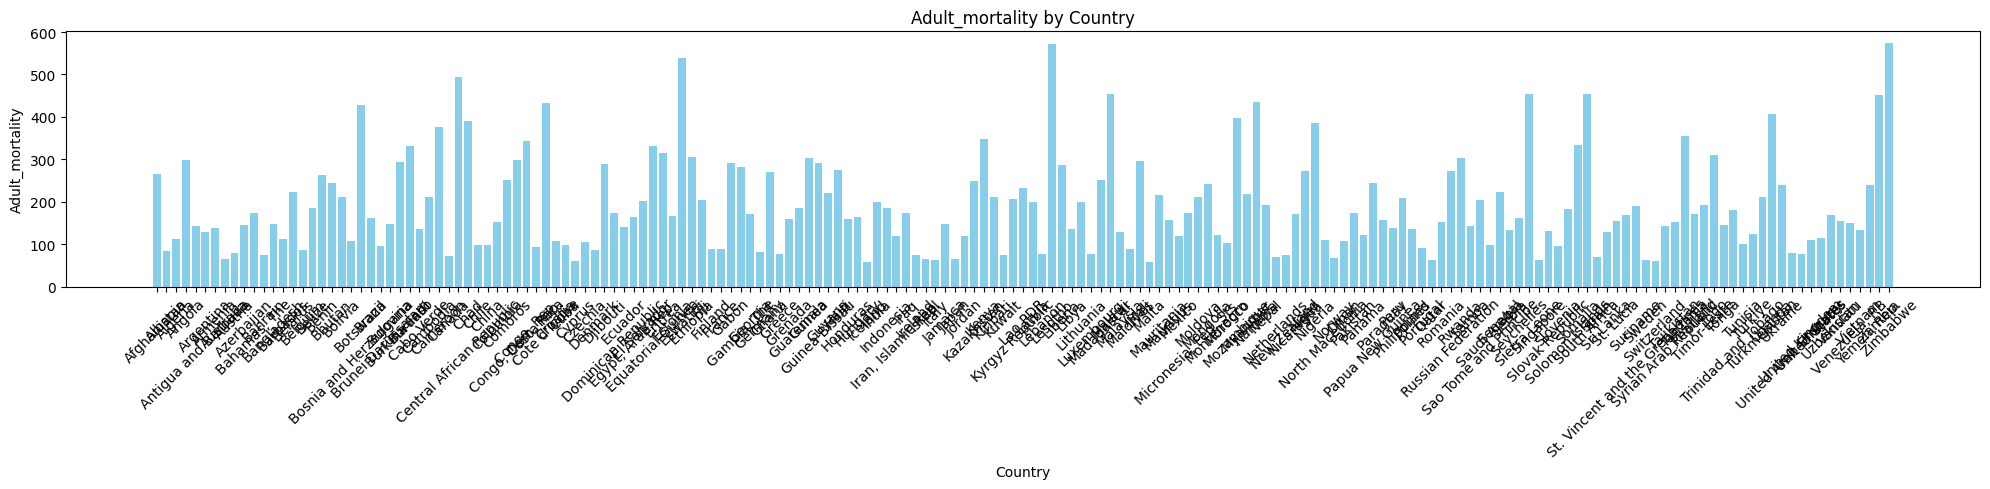

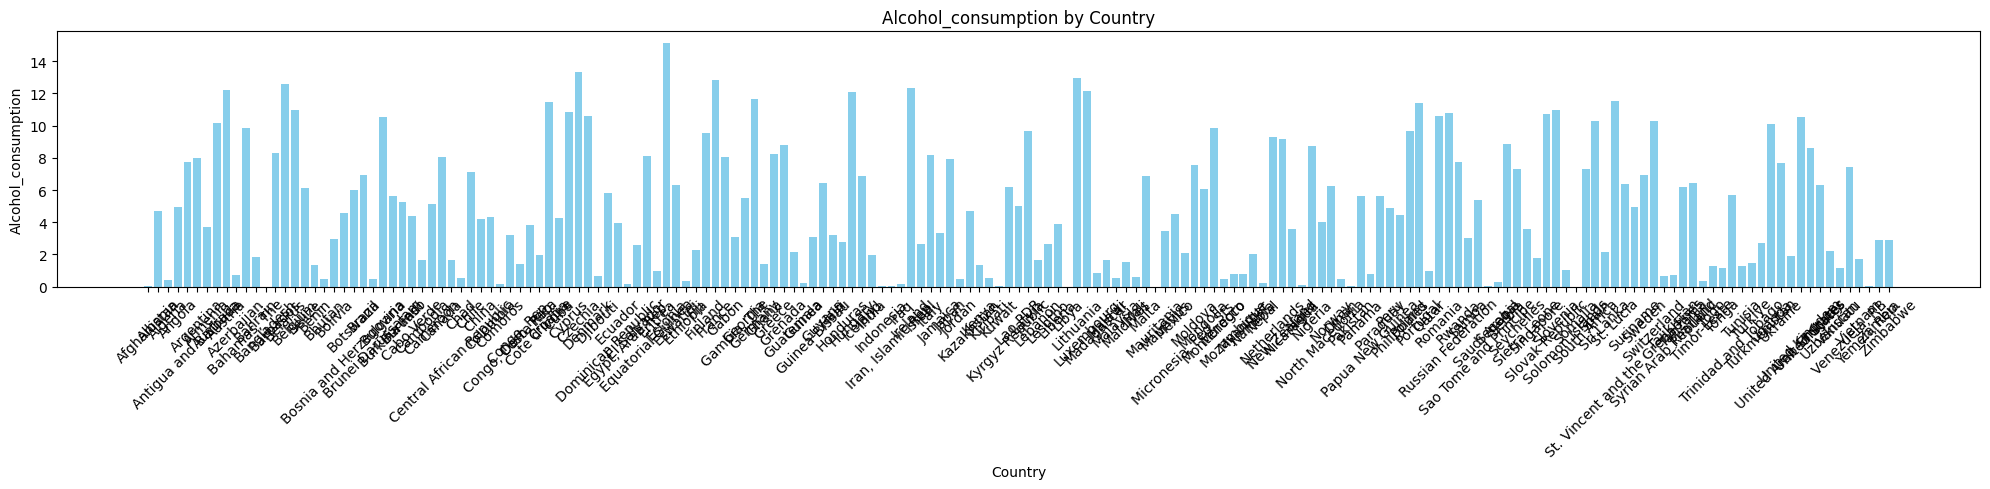

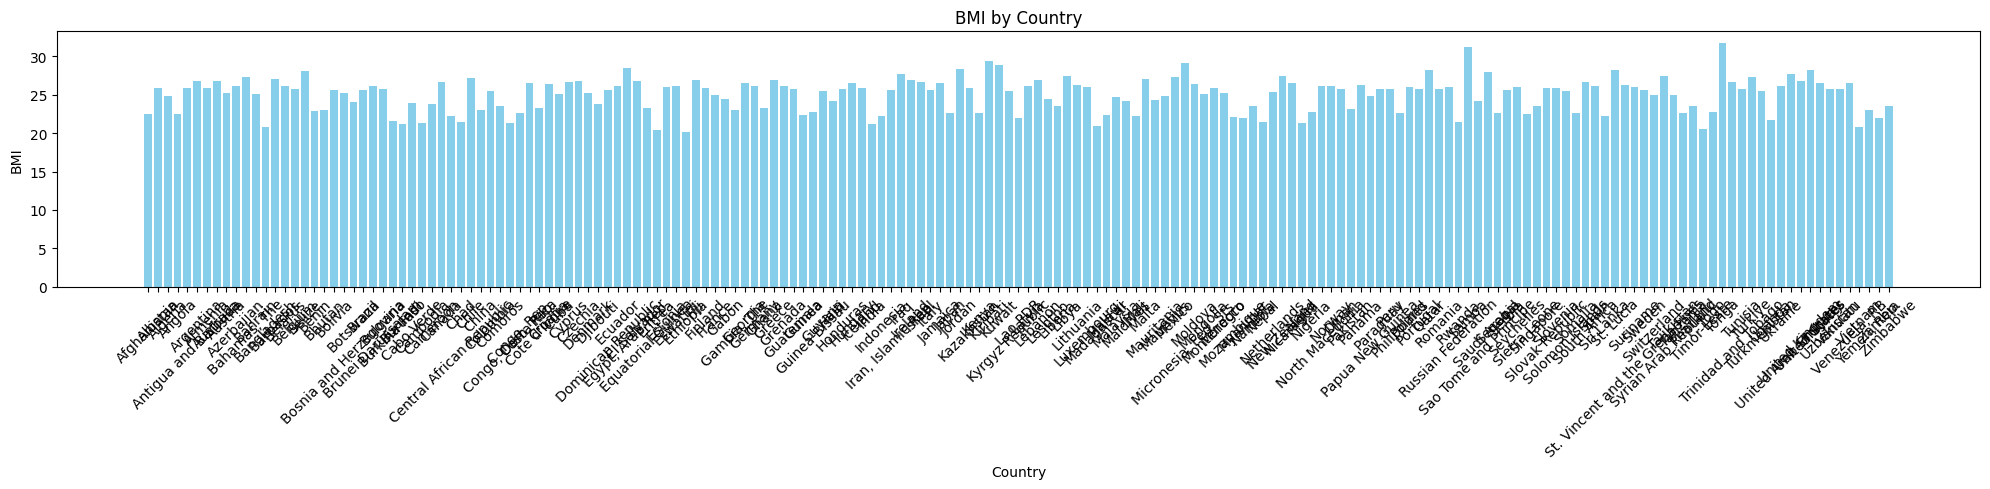

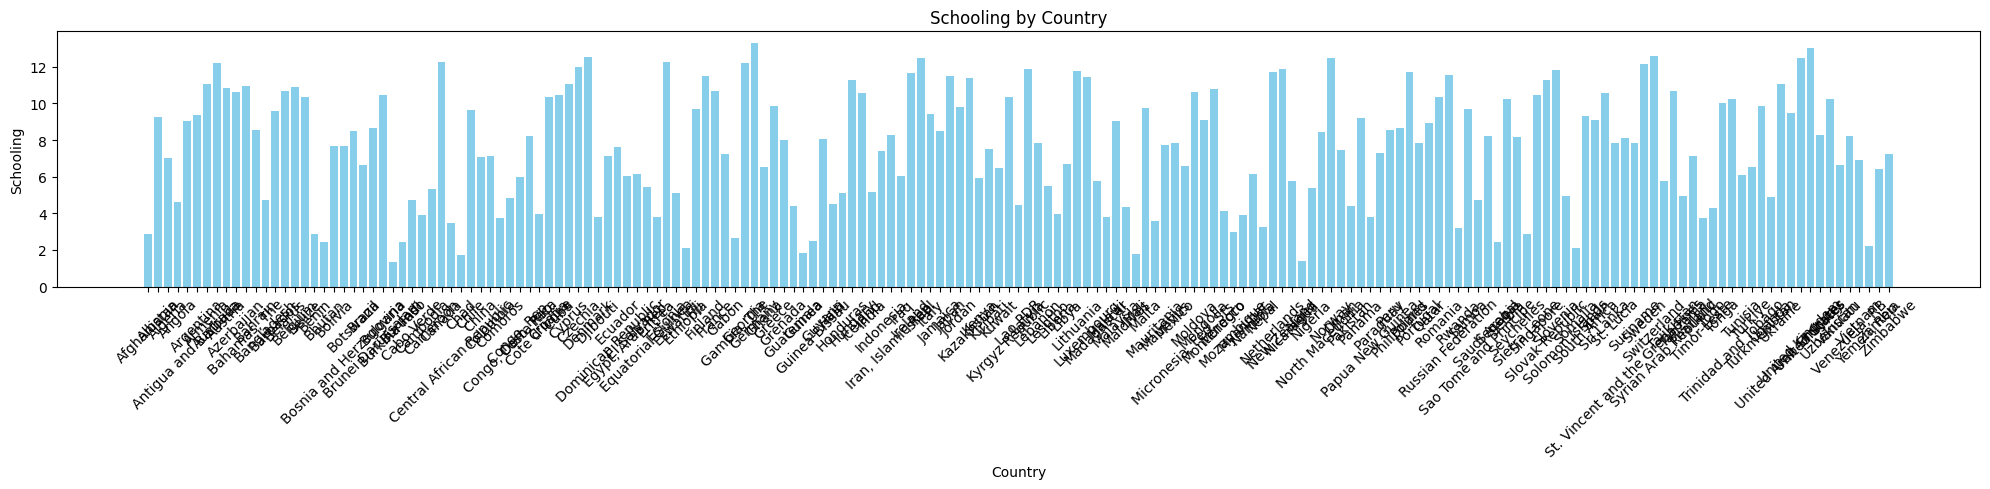

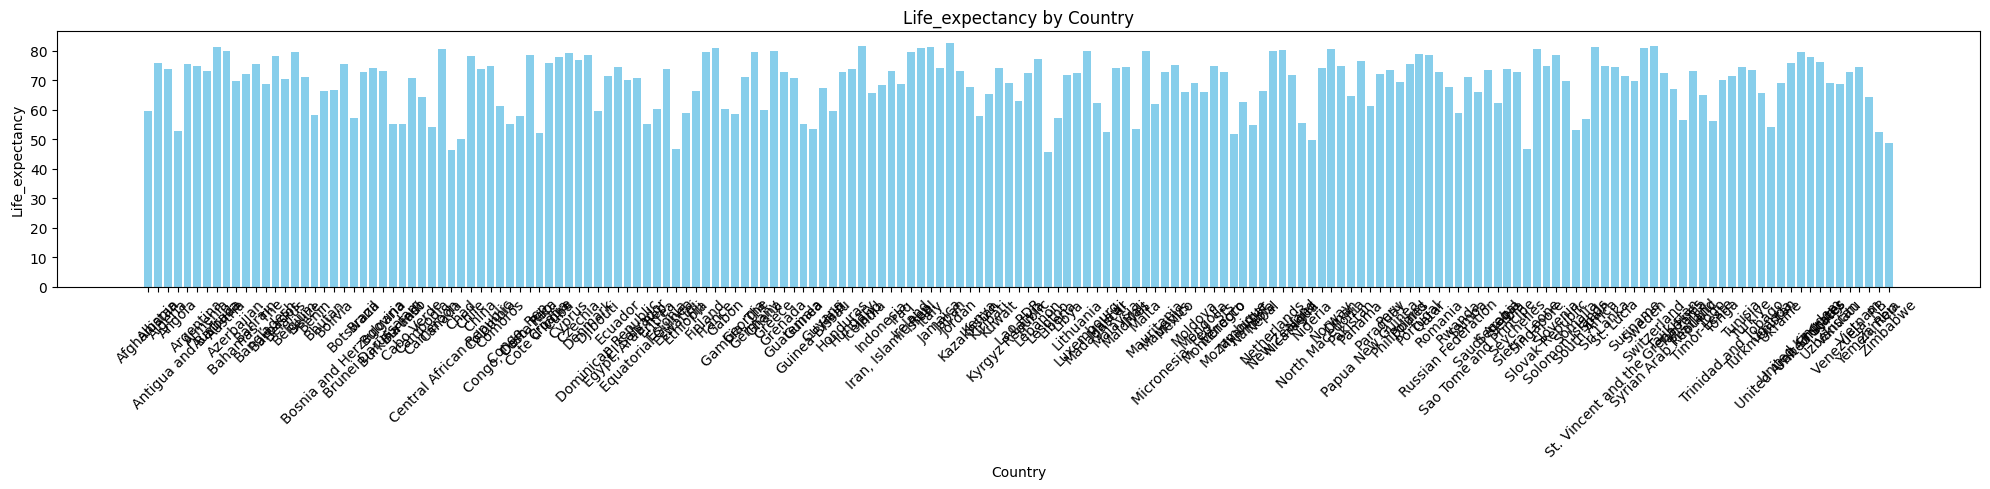

In [28]:
# 시각화를 위한 데이터프레임 준비
columns_to_plot = [
    "Adult_mortality",
    "Alcohol_consumption",
    "BMI",
    "Schooling",
    "Life_expectancy",
]

# 그래프 생성 (나라별)
for column in columns_to_plot:
    plt.figure(figsize=(20, 5))  # 그래프 크기 설정
    plt.bar(df["Country"], df[column], color='skyblue')  # 막대 그래프
    plt.title(f"{column} by Country")  # 제목
    plt.xlabel("Country")  # X축 라벨
    plt.ylabel(column)  # Y축 라벨
    plt.xticks(rotation=45)  # X축 라벨 회전
    plt.tight_layout()  # 레이아웃 조정
    plt.show()


### 데이터 시각화를 통한 탐색

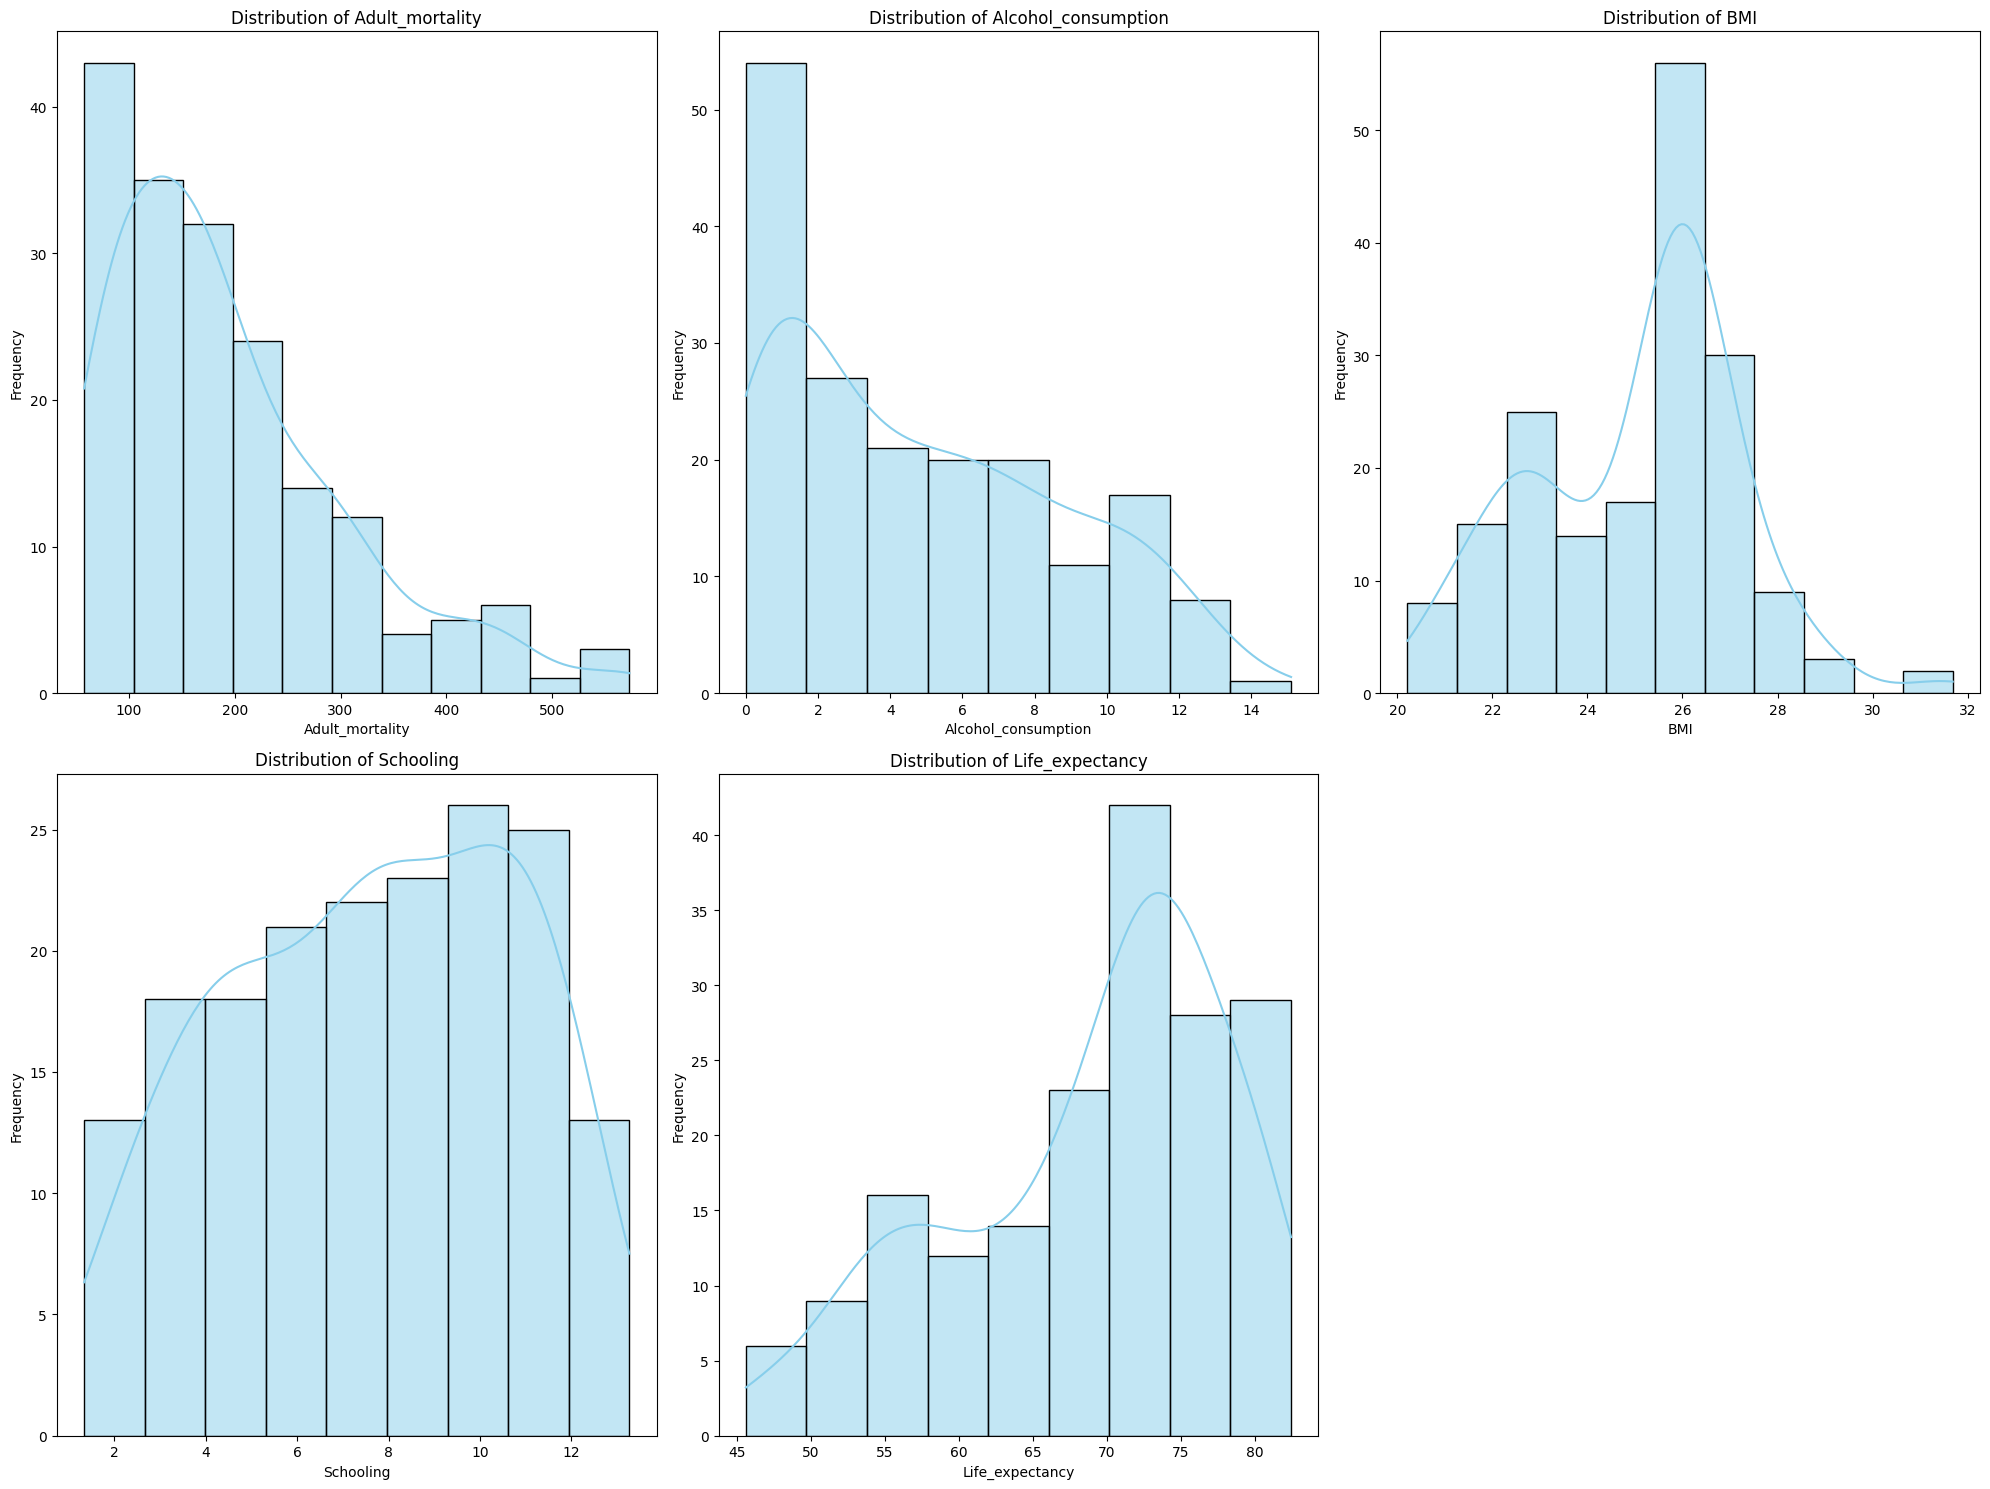

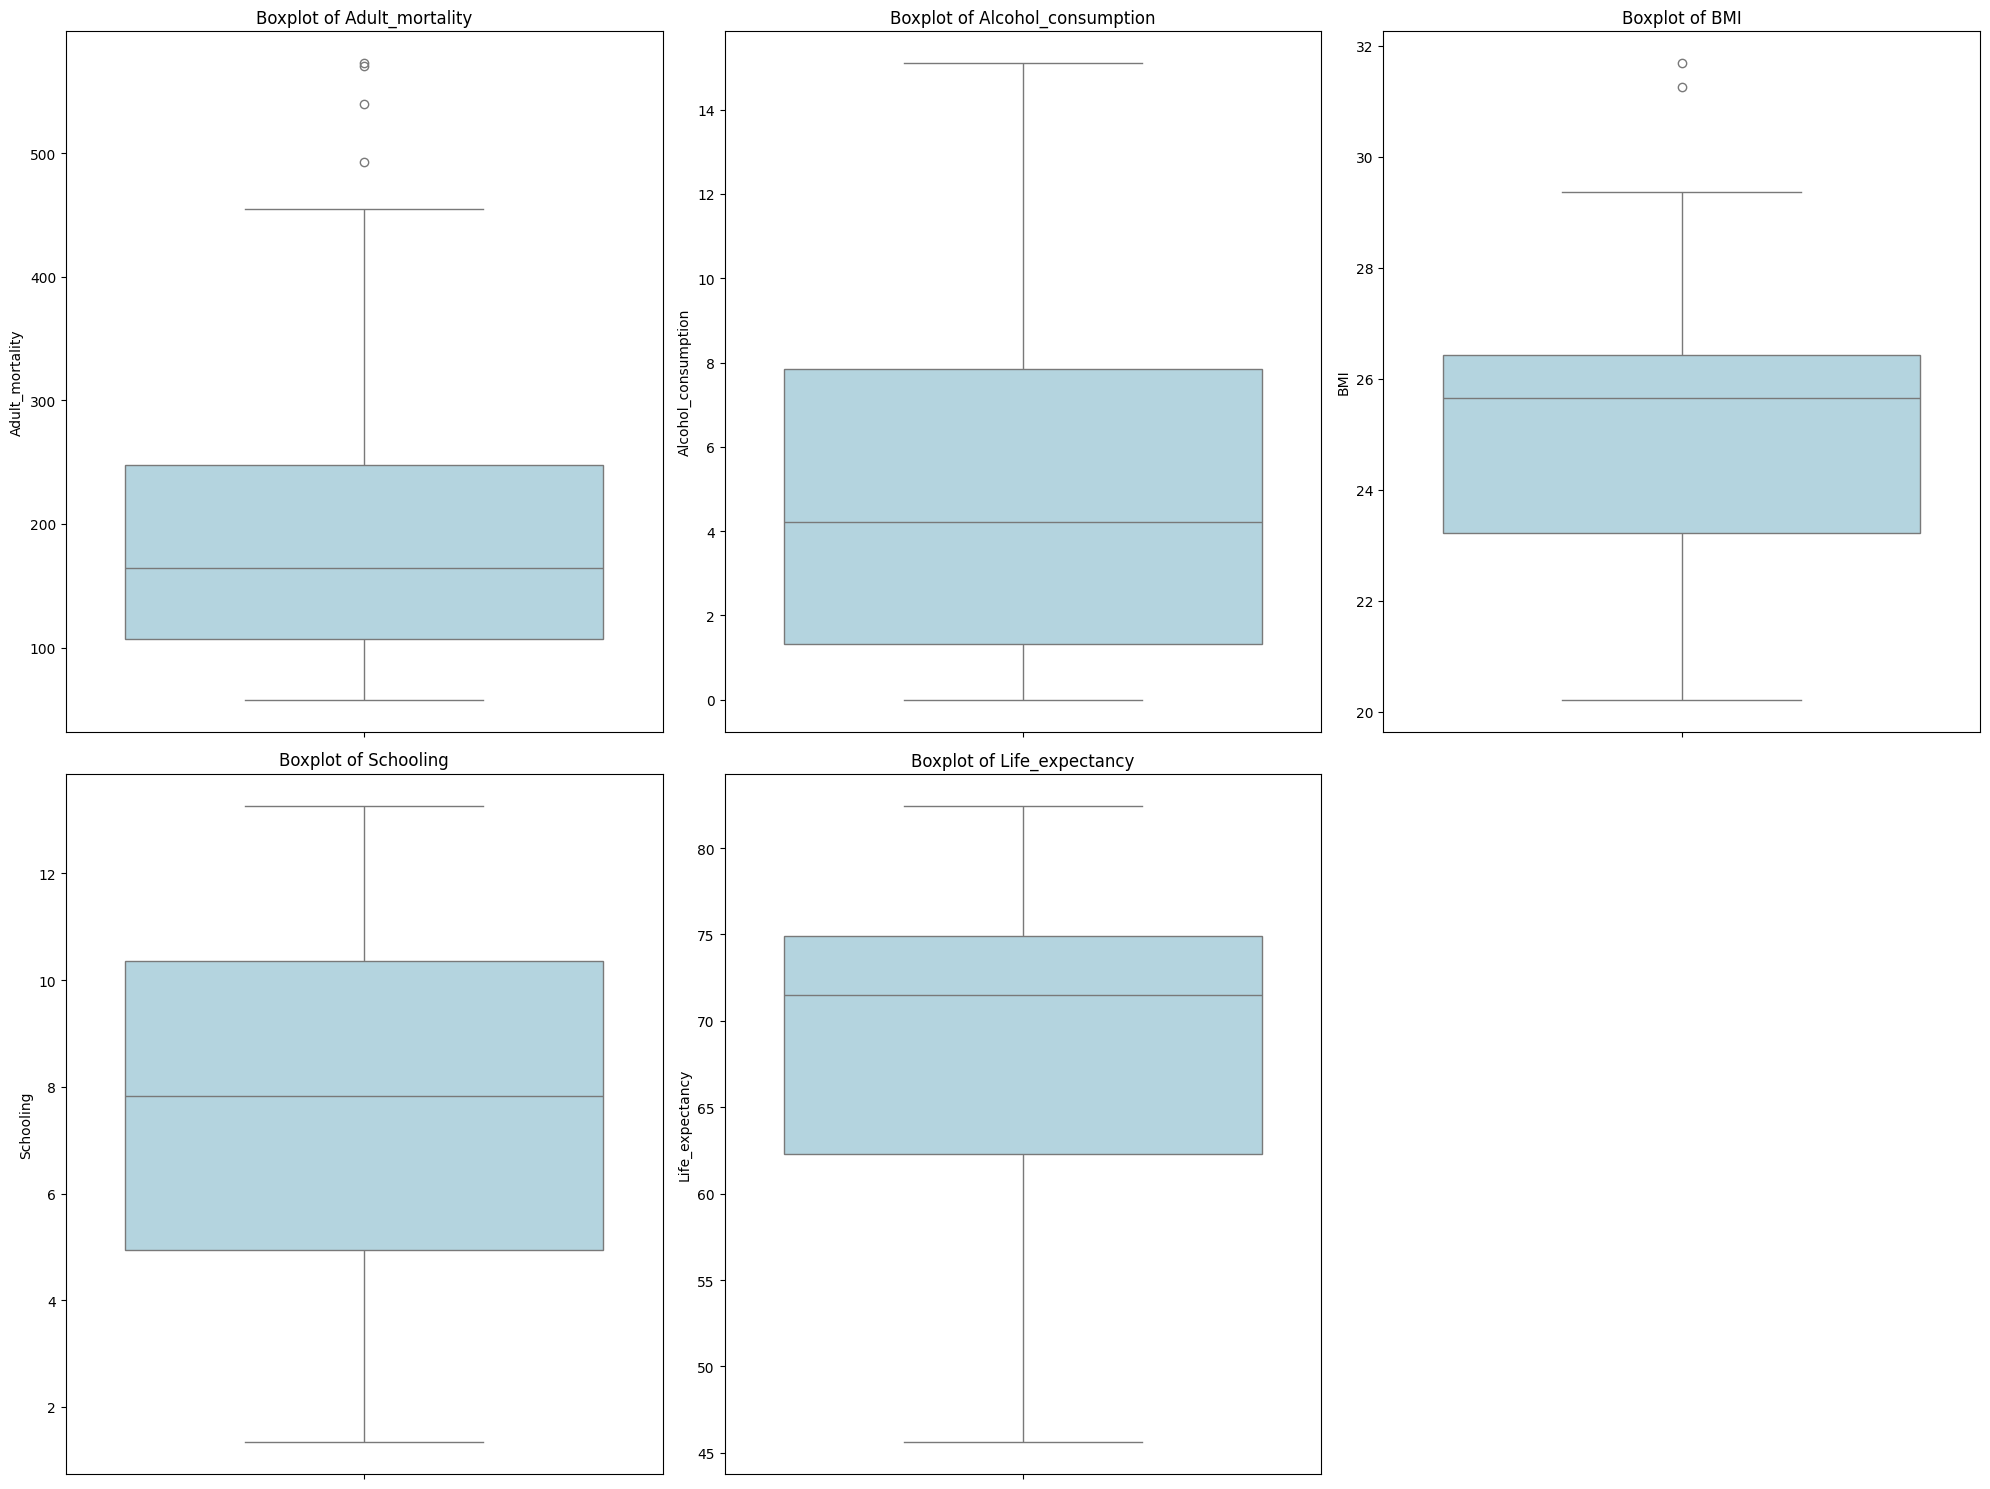

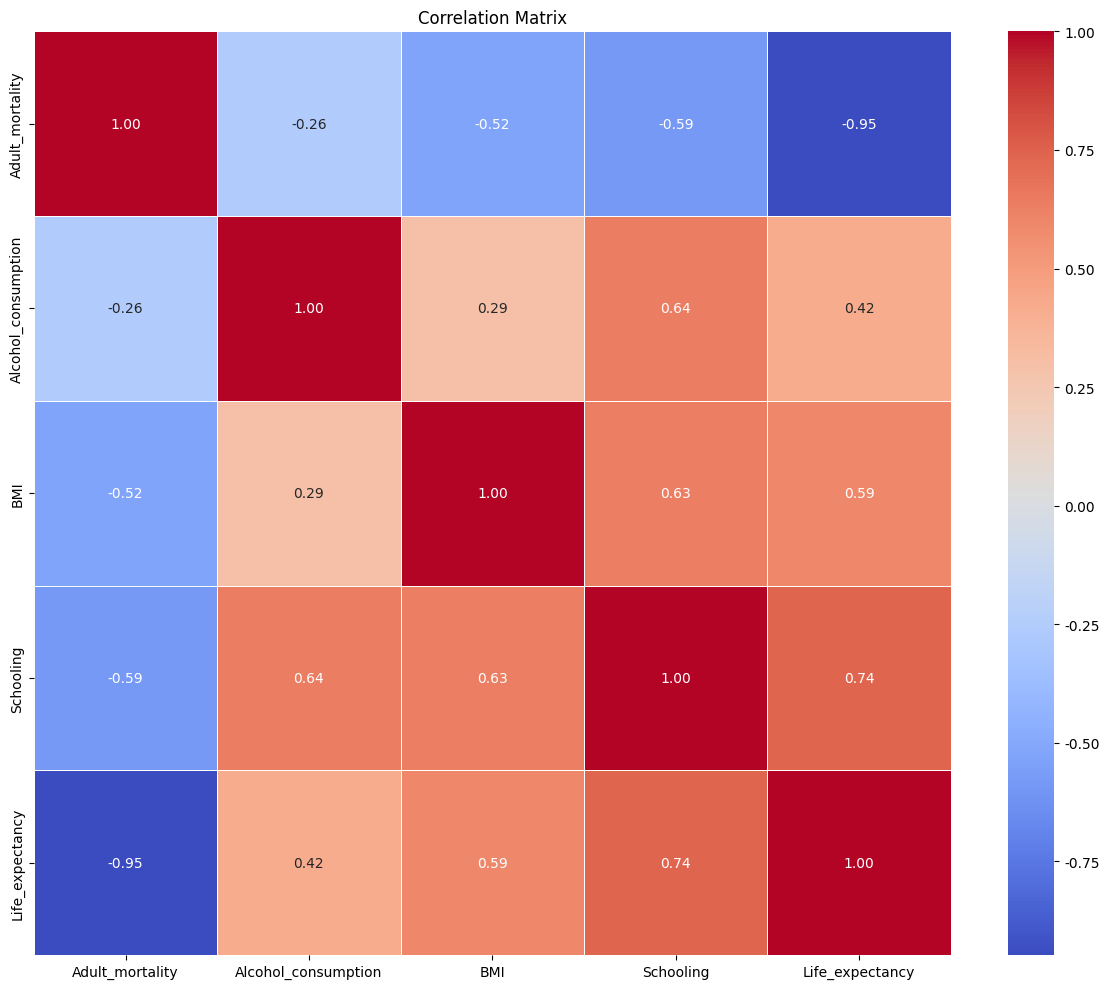

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# 1. 히스토그램 (Histogram) - 각 변수의 분포
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2x3 그리드, i번째 서브플롯
    sns.histplot(df[column], kde=True, color="skyblue")  # 히스토그램
    plt.title(f"Distribution of {column}")  # 제목
    plt.xlabel(column)  # X축 라벨
    plt.ylabel("Frequency")  # Y축 라벨
    plt.tight_layout()  # 레이아웃 조정

# 2. 박스플롯 (Boxplot) - 각 변수의 이상치 및 분포
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2x3 그리드, i번째 서브플롯
    sns.boxplot(data=df, y=column, color="lightblue")  # 박스플롯
    plt.title(f"Boxplot of {column}")  # 제목
    plt.tight_layout()  # 레이아웃 조정

# 3. 상관관계 행렬 (Correlation Matrix)
plt.figure(figsize=(12, 10))
correlation_matrix = df[columns_to_plot].corr()  # 상관관계 계산
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # 히트맵
plt.title("Correlation Matrix")  # 제목
plt.tight_layout()  # 레이아웃 조정

plt.show()


### 데이터 정제 및 전처리
- None 값은 존재하지 않다.
- 내가 가진 데이터의 경우는 '대륙' 정도만 정제할 필요가 있을것 같다.
- BMI의 경우 WHO에서 정해준 기준으로 전처리를 진행해보자

In [30]:
# # 'Region' 컬럼을 숫자형으로 변환
# print(new_df['Region'].unique(),'\n')
# new_df['Region'] = pd.factorize(new_df['Region'])[0]

# 변환된 결과 확인
new_df['Region'].unique()

# BMI 기준에 따라 새로운 컬럼 추가
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0
    elif 18.5 <= bmi and bmi <= 22.9:
        return 1
    elif 23.0 <= bmi and bmi <=24.9:
        return 2
    else:
        return 3

# BMI 데이터에 따라 범주형 데이터로 변환
new_df['BMI_Category'] = new_df['BMI'].apply(categorize_bmi)


# new_df['BMI_Category'] = pd.factorize(new_df['BMI_Category'])[0]

# 결과 확인
print(new_df[['BMI', 'BMI_Category']])


          BMI  BMI_Category
0    22.46250             1
1    25.85625             3
2    24.86875             2
3    22.51875             1
4    25.85000             3
..        ...           ...
174  26.49375             3
175  20.76250             1
176  23.02500             2
177  22.00000             1
178  23.54375             2

[179 rows x 2 columns]


C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\416185239.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BMI_Category'] = new_df['BMI'].apply(categorize_bmi)


### 데이터 변환 및 피처 엔지니어링
- 내가 가지고 있는 숫자형 데이터를 전부 ***StandardScaler***정규화 처리를 해준다.
- 음... 정규화 처리 할때 BMI의 경우는 수치의 격차가 크지 않은 데이턴데 해줘야 하나...?

In [31]:
columns_to_plot = [
    "Adult_mortality",
    "Alcohol_consumption",
    "BMI",
    "Schooling",
    "Life_expectancy",
    "BMI_Category"
]

In [32]:
from sklearn.preprocessing import StandardScaler

# 'Country'와 'Region' 제외한 숫자형 컬럼을 선택
columns_to_scale = new_df.drop(columns=['Country', 'Region','BMI_Category'])

# 스케일링 처리
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_to_scale)

print(scaled_data)
# 스케일링된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale.columns)

# 결과 확인
display(scaled_df.describe())

# 새 데이터 프레임 생성
new_scaled_df = pd.concat([new_df[['Country', 'Region','BMI_Category']], scaled_df], axis=1)
new_scaled_df

[[ 0.66057805 -1.23085127 -1.19032458 -1.51759822  0.51045409 -1.00303689]
 [-0.97999129 -0.03176719  0.38126864  0.51685099  0.51045409  0.77343512]
 [-0.7078116  -1.13235256 -0.07602736 -0.20472705  0.51045409  0.53766246]
 ...
 [ 0.42571677 -1.22294192 -0.92983952 -1.73407163  0.51045409 -0.51173029]
 [ 2.33962406 -0.4912784  -1.40450119 -0.38311718  0.51045409 -1.80166566]
 [ 3.41925266 -0.49191883 -0.6896144  -0.13457363  0.51045409 -2.20166147]]


,Adult_mortality,Alcohol_consumption,BMI,Schooling,Economy_status,Life_expectancy
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,5.458080e-17,9.923781e-18,2.324646e-15,-1.231169e-16,-1.389329e-16,-9.576449e-16
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-1.208311e+00,-1.234976e+00,-2.232265e+00,-2.018694e+00,-1.959040e+00,-2.534878e+00
25%,-7.652212e-01,-8.973934e-01,-8.372226e-01,-8.611626e-01,5.104541e-01,-7.144539e-01
50%,-2.498446e-01,-1.566518e-01,2.857575e-01,6.386033e-02,5.104541e-01,2.889428e-01
75%,4.963968e-01,7.742987e-01,6.446480e-01,8.766378e-01,5.104541e-01,6.630445e-01
max,3.419253e+00,2.633238e+00,3.081630e+00,1.807674e+00,5.104541e-01,1.482797e+00


,Country,Region,BMI_Category,Adult_mortality,Alcohol_consumption,BMI,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,1,0.660578,-1.230851,-1.190325,-1.517598,0.510454,-1.003037
1,Albania,Rest of Europe,3,-0.979991,-0.031767,0.381269,0.516851,0.510454,0.773435
2,Algeria,Africa,2,-0.707812,-1.132353,-0.076027,-0.204727,0.510454,0.537662
3,Angola,Africa,1,0.948320,0.029394,-1.164276,-0.970402,0.510454,-1.747833
4,Antigua and Barbuda,Central America and Caribbean,3,-0.447009,0.751643,0.378374,0.444693,0.510454,0.708018
...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,3,-0.369976,0.675592,0.676485,0.194145,0.510454,0.429316
175,Vietnam,Asia,1,-0.531649,-0.788600,-1.977568,-0.234793,0.510454,0.596946
176,"Yemen, Rep.",Middle East,2,0.425717,-1.222942,-0.929840,-1.734072,0.510454,-0.511730
177,Zambia,Africa,1,2.339624,-0.491278,-1.404501,-0.383117,0.510454,-1.801666


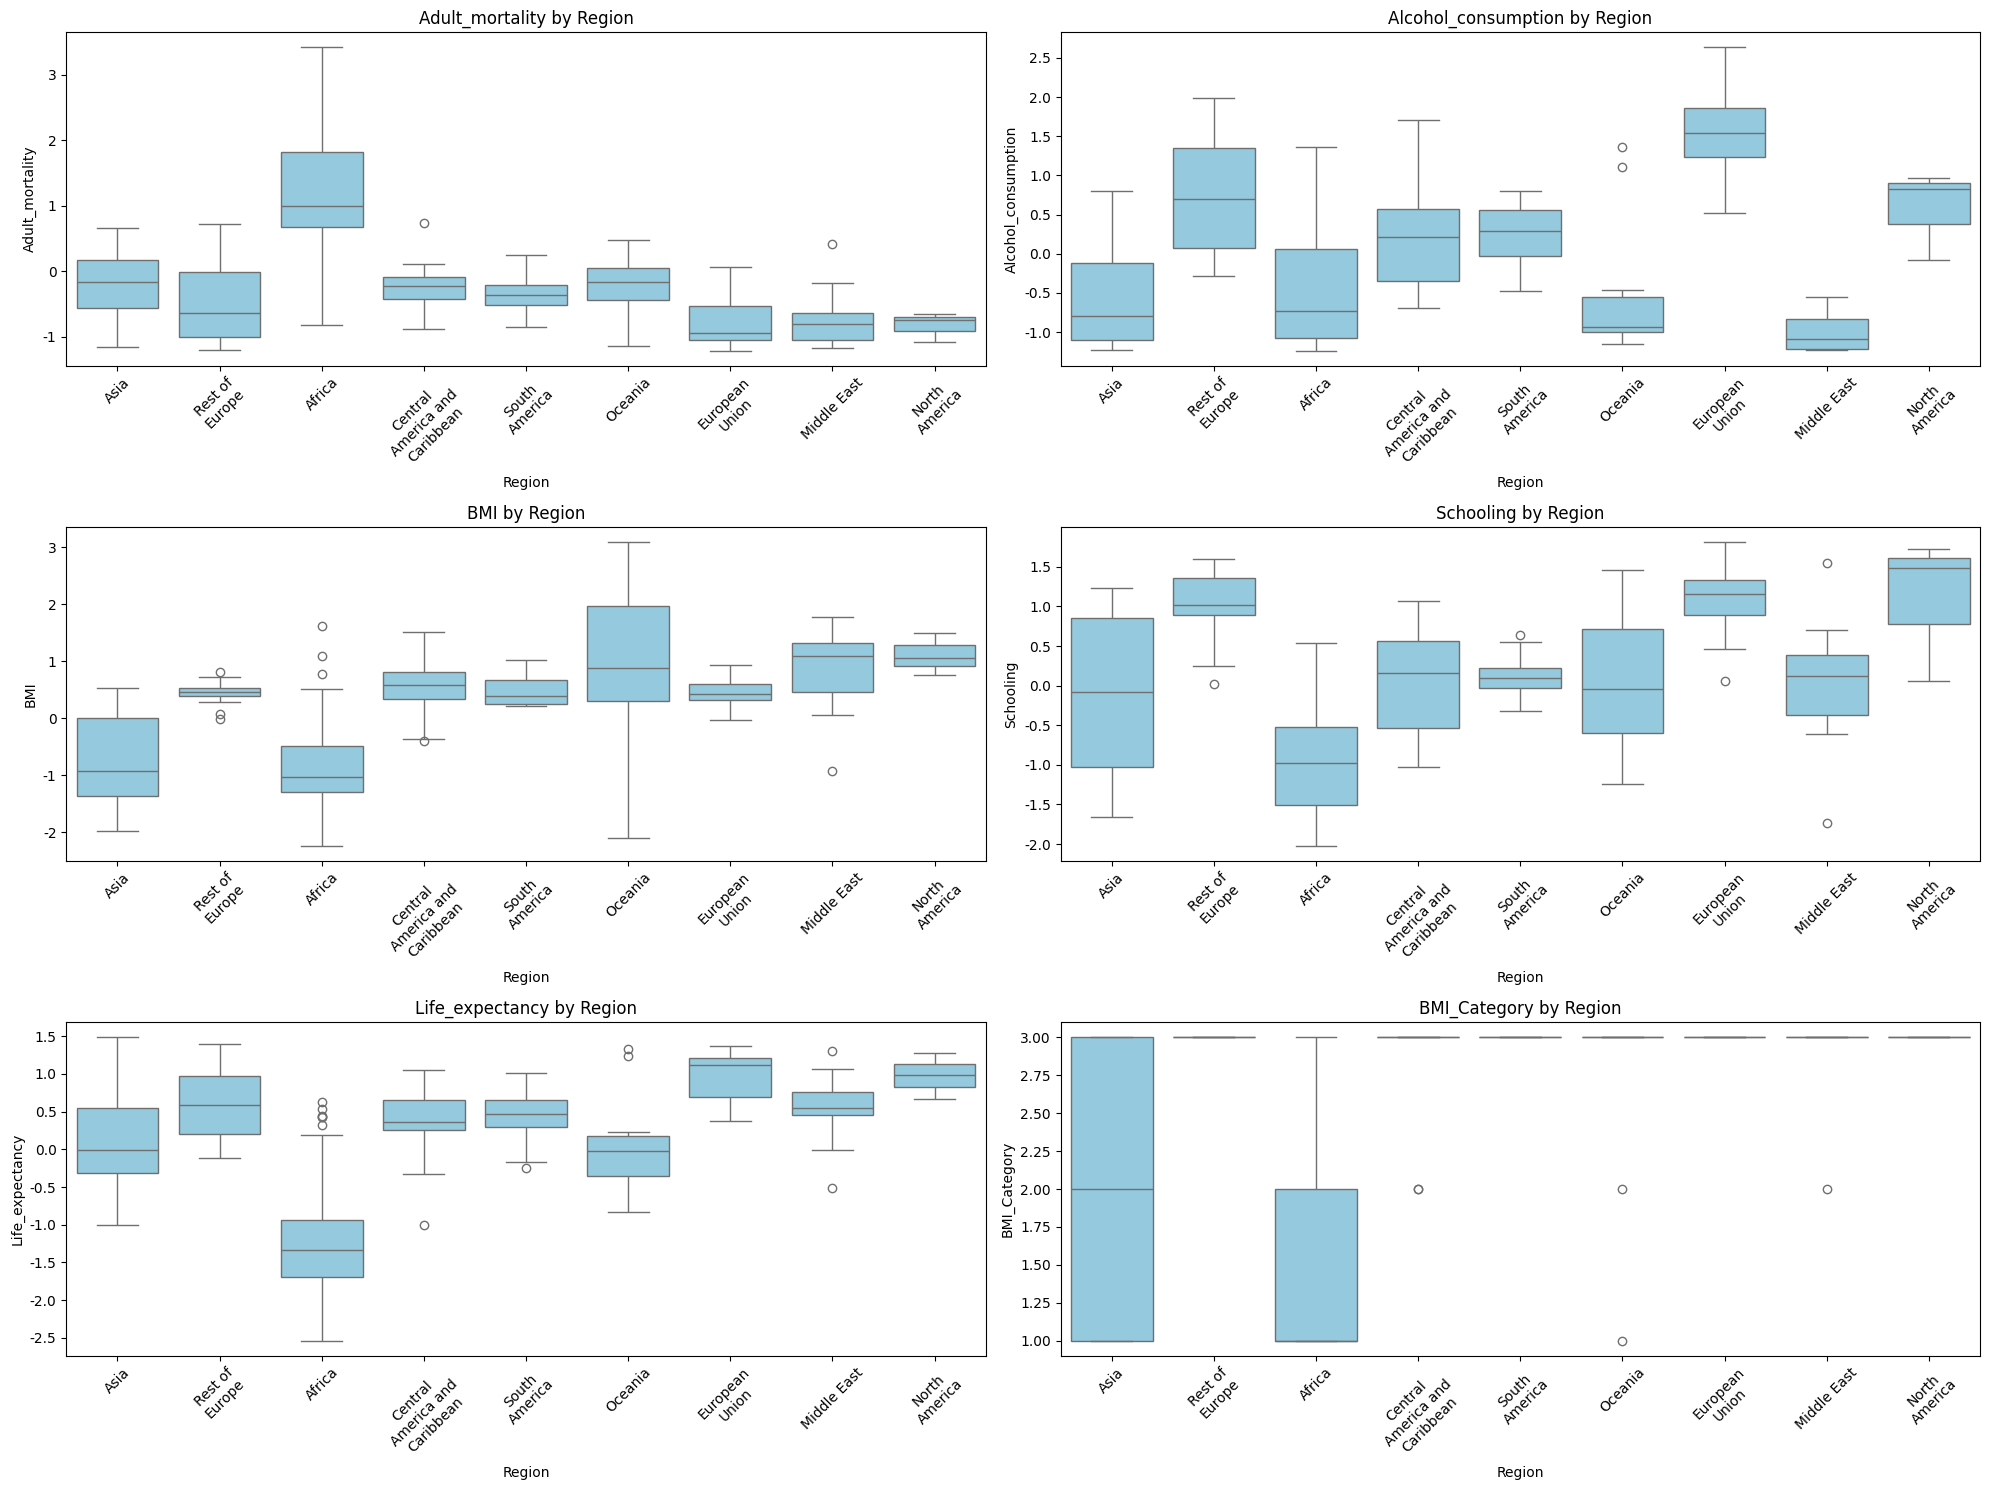

In [33]:
# 4x4 서브플롯 설정
plt.figure(figsize=(20, 15))

# 그래프 생성 (대륙별)
for i, column in enumerate(columns_to_plot, 1):
    ax = plt.subplot(3, 2, i)  # 4x4 그리드, i번째 서브플롯
    sns.boxplot(x=new_scaled_df["Region"], y=new_scaled_df[column],ax=ax, color='skyblue')  # 막대 그래프
    ax.set_title(f"{column} by Region")  # 제목
    ax.set_xlabel("Region")  # X축 라벨
    ax.set_ylabel(column)  # Y축 라벨

    # X축 레이블이 길면 2줄로 나누기
    labels = ax.get_xticklabels()  # X축 레이블 가져오기
    ticks = ax.get_xticks()  # X축 레이블 위치 가져오기
    new_labels = []
    for label in labels:
        if len(label.get_text()) > 12:
            # 12자 이상이면 2줄로 나누기
            wrapped_label = textwrap.fill(label.get_text(), 12)
            new_labels.append(wrapped_label)
        else:
            new_labels.append(label.get_text())

    ax.set_xticks(ticks)  # X축 위치 설정
    ax.set_xticklabels(new_labels, rotation=45)  # 회전 후 레이블 설정

    plt.tight_layout()  # 레이아웃 조정



plt.show()


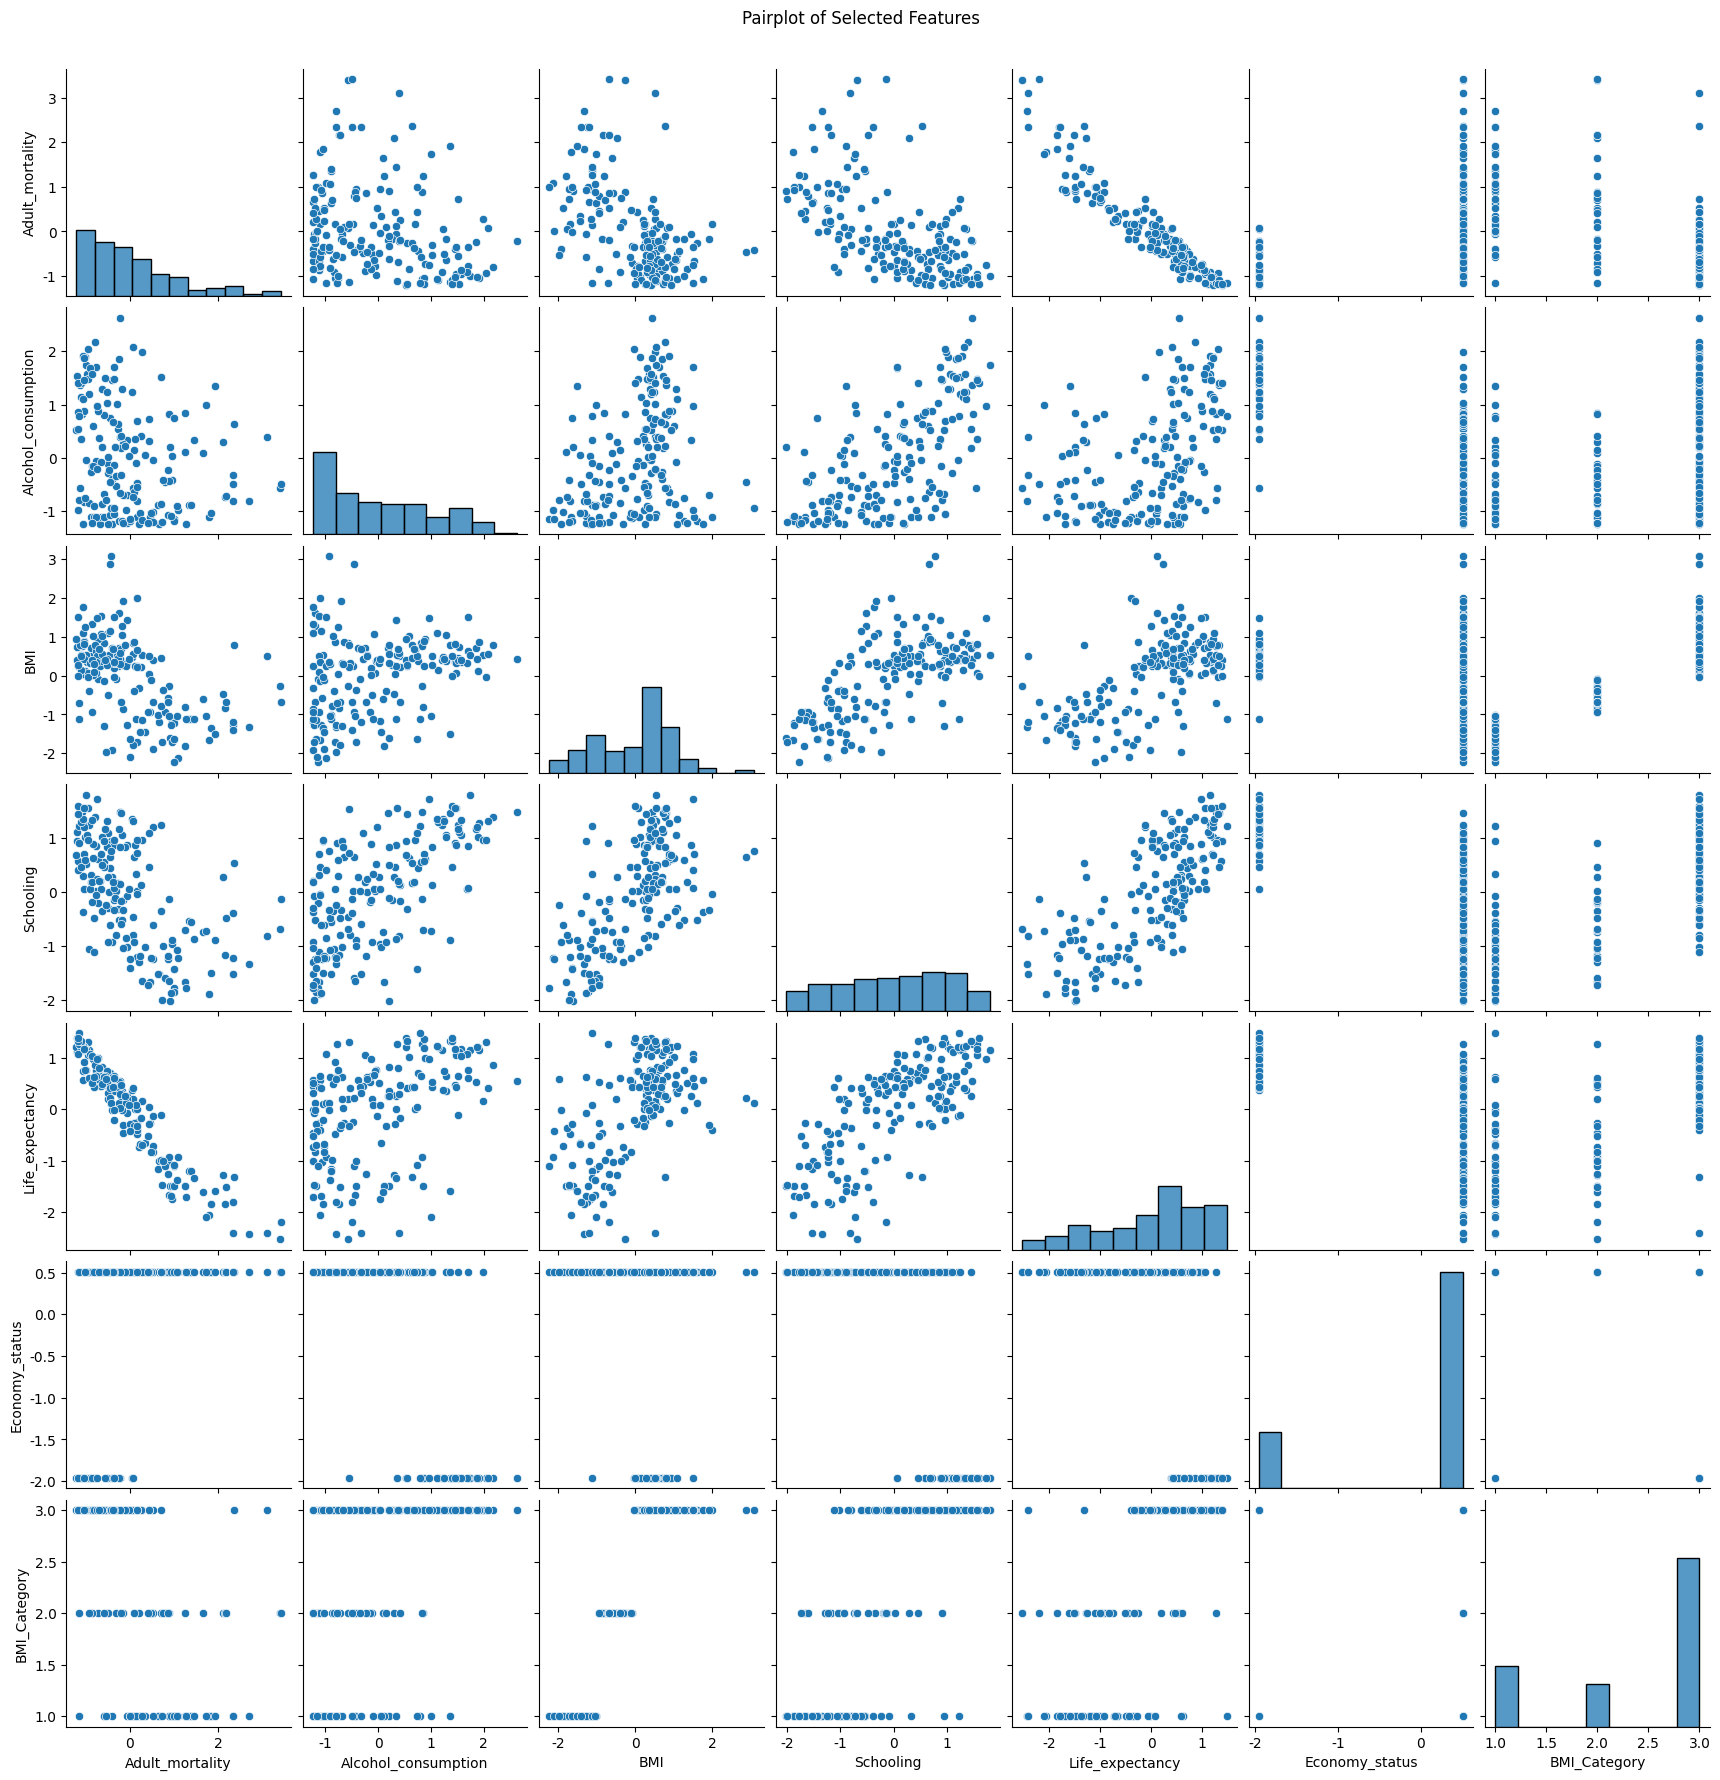

In [34]:
# 여러 컬럼 간의 관계를 보여주는 페어플롯
sns.pairplot(new_scaled_df[['Adult_mortality', 'Alcohol_consumption', 'BMI', 'Schooling', 'Life_expectancy', 'Economy_status','BMI_Category']])
plt.suptitle("Pairplot of Selected Features", y=1.02)  # 제목 추가
plt.show()

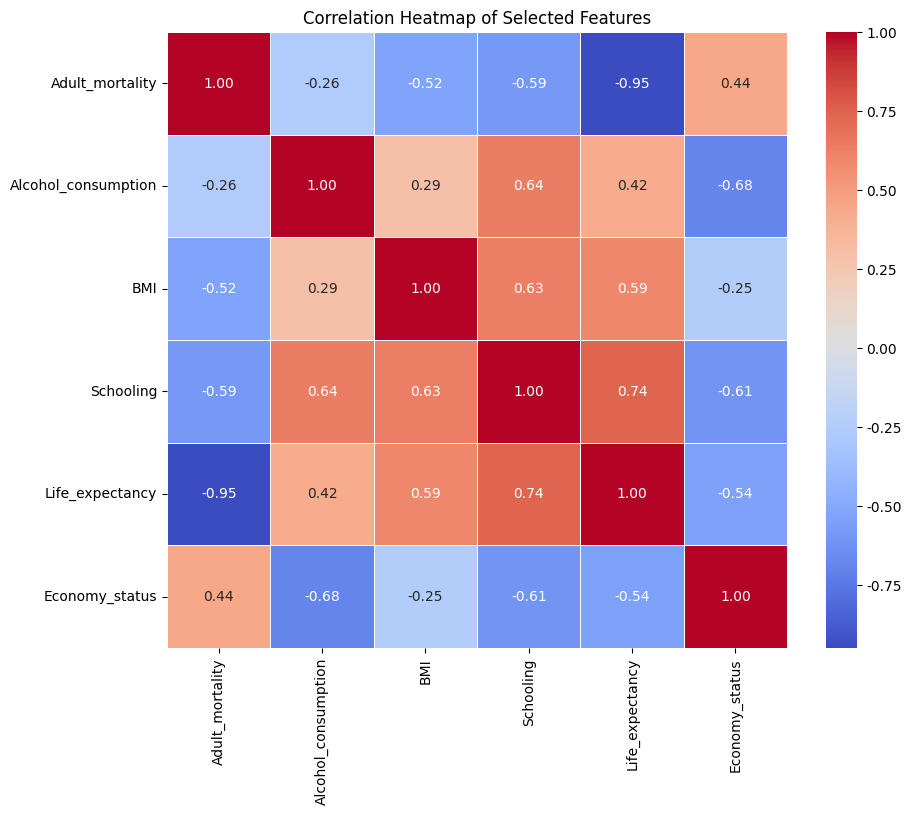

In [35]:
# 상관계수 계산
corr_matrix = new_scaled_df[['Adult_mortality', 'Alcohol_consumption', 'BMI', 'Schooling', 'Life_expectancy', 'Economy_status']].corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


### BMI_Category를 이용한 데이터 시각화

#### BMI 카테고리별 데이터 시각화

C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\249846094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_scaled_df, x='BMI_Category', palette='coolwarm', order=["0", "1", "2", "3"])


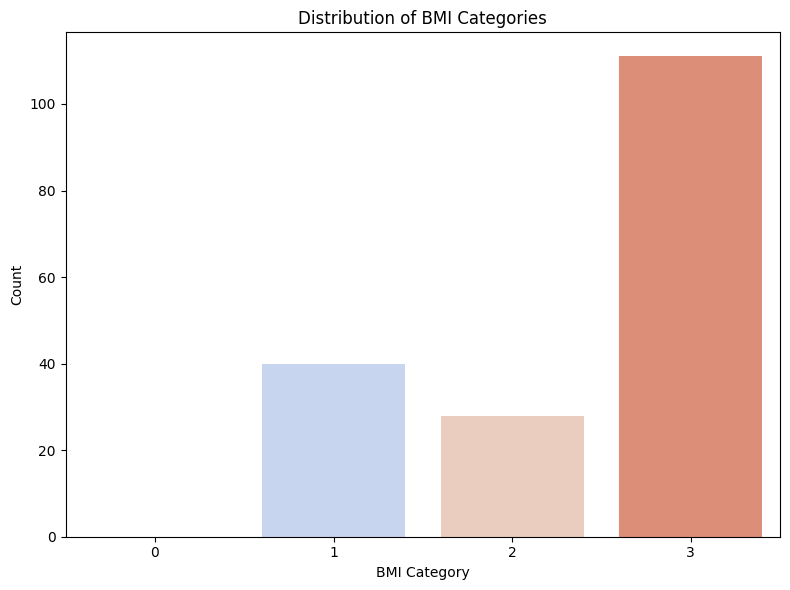

In [36]:


plt.figure(figsize=(8, 6))
sns.countplot(data=new_scaled_df, x='BMI_Category', palette='coolwarm', order=["0", "1", "2", "3"])
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\3620480908.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


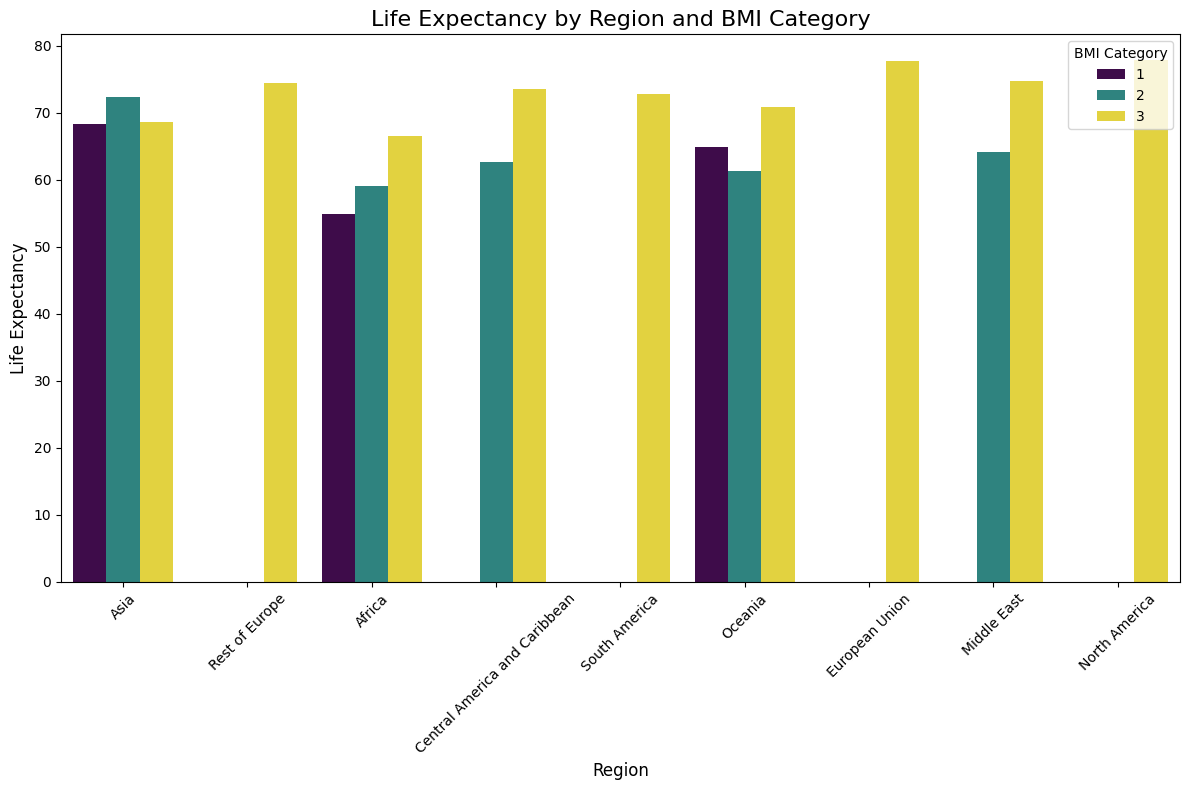

In [37]:


plt.figure(figsize=(12, 8))
sns.barplot(
    data=new_df,
    x="Region",
    y="Life_expectancy",
    hue="BMI_Category",
    palette="viridis",
    dodge=True,
    ci=None
)

plt.title("Life Expectancy by Region and BMI Category", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="BMI Category")
plt.tight_layout()
plt.show()


- 히트맵에서 내 생각과 반대로 BMI와 평균 수명이 비례관계라고 나왔는데 이해가 안가 데이터를 분석하고 BMI를 기준별로 나눠서 봤는데 그게 아니였다.
- 만약 BMI랑 평균 수명을 연관을 짓고 싶다면 다른 컬럼들을 더 추가해서 고려해야 할것 같다. 

##### 혹시 값이 이상한가 해서 찍어본 이상한 대륙의 데이터 출력

In [38]:
# 'Rest of Europe' 대륙에 해당하는 데이터 필터링
rest_of_europe_data = new_df[new_df['Region'] == 'Rest of Europe']
EU_data = new_df[new_df['Region'] == 'European Union']

# 결과 출력
rest_of_europe_data[['BMI_Category','BMI']]


,BMI_Category,BMI
1,3,25.85625
6,3,25.94375
14,3,26.16875
20,3,25.20625
61,3,26.58750
73,3,25.90000
107,3,26.45000
109,3,25.86250
120,3,26.12500
121,3,26.18125


### 공부와 성인 사망률의 관계(음의 관계)
- 내 예상 : 히트맵은 서로 관계성이 높다는데 뭔 관계가 있찌??

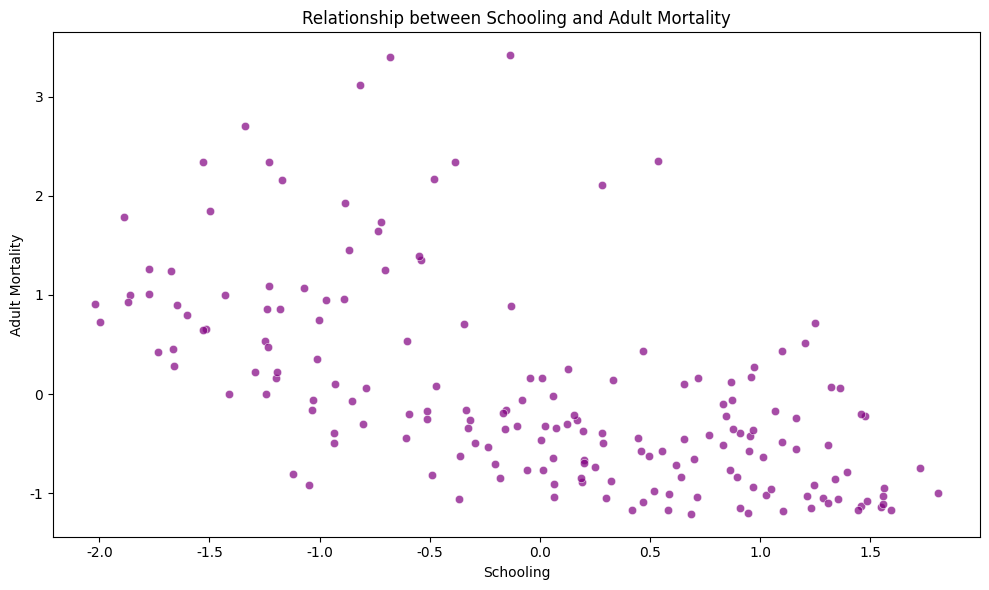

In [39]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 산점도 생성
sns.scatterplot(x='Schooling', y='Adult_mortality', data=new_scaled_df, color='purple', alpha=0.7)

# 제목과 축 라벨 설정
plt.title('Relationship between Schooling and Adult Mortality')
plt.xlabel('Schooling')
plt.ylabel('Adult Mortality')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

- 현재 지역 구분없이 전세계적으로 산포도를 확인했을 때 공부량이 많아질수록 사망자의 표준 편차도 줄어들고 있다.
- 그렇다면 선진국이 많은 대륙과 그렇지 않은 대륙의 차이는 어떨까?

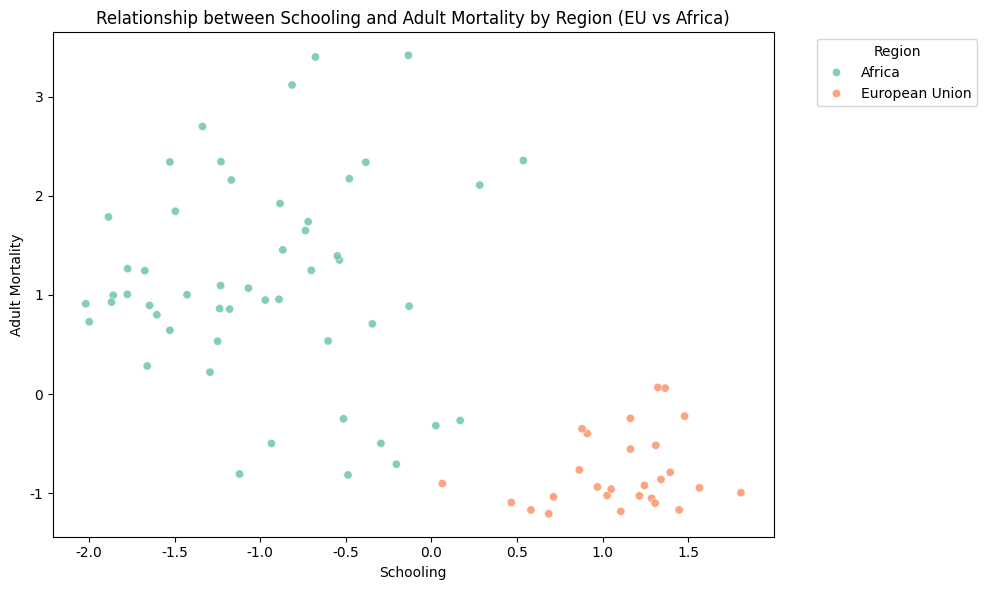

In [40]:
# 두 대륙 (European Union과 Africa)만 필터링
filtered_df = new_scaled_df[new_scaled_df['Region'].isin(['European Union', 'Africa'])]

# 산포도 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Adult_mortality', data=filtered_df, hue='Region', palette='Set2', alpha=0.8)

# 그래프 제목, 축 라벨 설정
plt.title('Relationship between Schooling and Adult Mortality by Region (EU vs Africa)')
plt.xlabel('Schooling')
plt.ylabel('Adult Mortality')

# 범례 위치 조정
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

- ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 
- 생각지도 못한 결과가 나왔다 
- 내 생각엔 당연히 공부량이 많은 나라일수록 의료에 관한 시설이 좋아서 그런게 아닐까? 라는 생각이 든다

### 성인 사망자 수와 알콜 섭취량의 관계(0에 가장 가까움)
- 히트맵의 관계도에서 가장 연관이 없는 데이터 두 컬럼
- 왜 그런지 데이터를 시각화 해보자

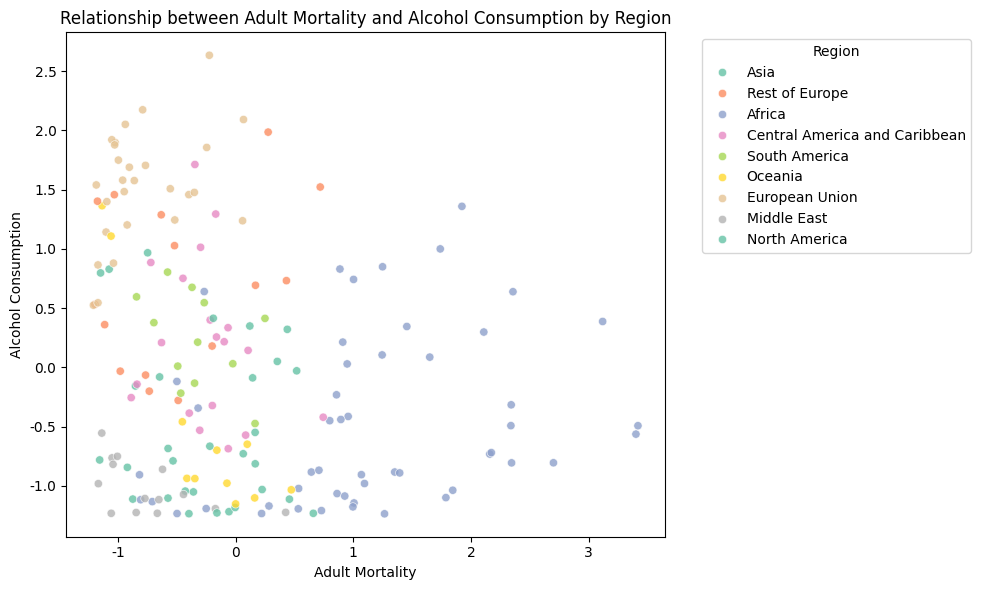

In [41]:
# 산포도 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adult_mortality', y='Alcohol_consumption', data=new_scaled_df, hue='Region', palette='Set2', alpha=0.8)

# 그래프 제목과 레이블 설정
plt.title('Relationship between Adult Mortality and Alcohol Consumption by Region')
plt.xlabel('Adult Mortality')
plt.ylabel('Alcohol Consumption')

# 범례 설정
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

- 산포도로 보기 어렵다. 다른 그래프로 바꿔보자

C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\1381524722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Adult_mortality', data=new_scaled_df, palette='Set2', showfliers=False)
C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\1381524722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Alcohol_consumption', data=new_scaled_df, palette='Set2', showfliers=False)


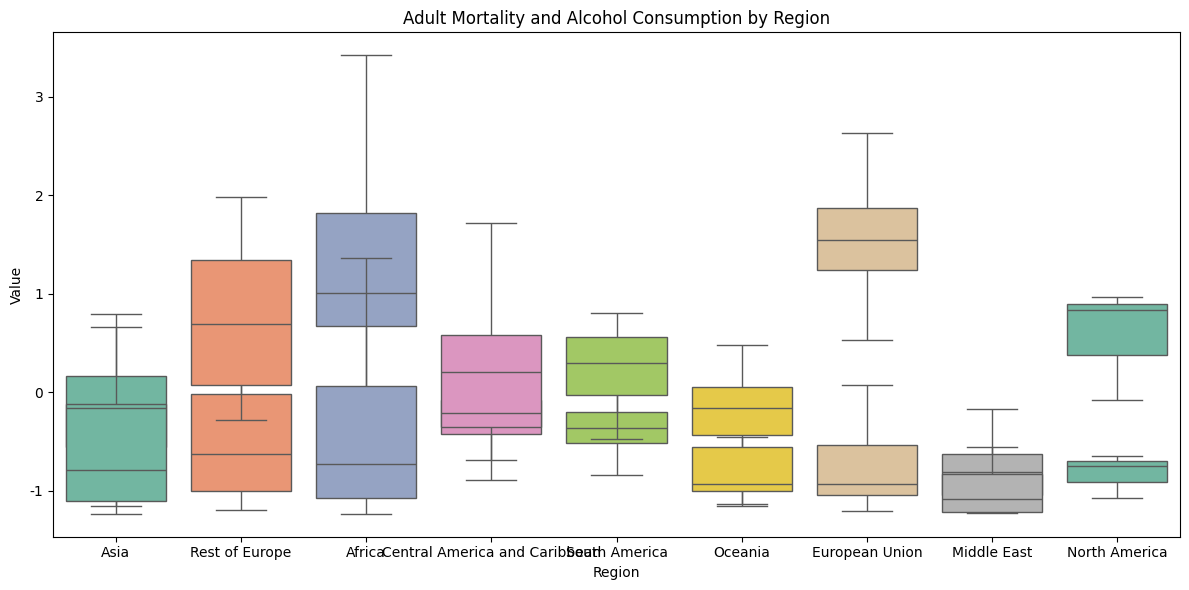

In [42]:

# 박스플롯을 통한 두 변수 간의 관계 시각화
plt.figure(figsize=(12, 6))

# 박스플롯 그리기
sns.boxplot(x='Region', y='Adult_mortality', data=new_scaled_df, palette='Set2', showfliers=False)
sns.boxplot(x='Region', y='Alcohol_consumption', data=new_scaled_df, palette='Set2', showfliers=False)

# 그래프 제목과 레이블 설정
plt.title('Adult Mortality and Alcohol Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Value')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


- 박스 플롯으로 두 데이터를 보려니 더 어지럽다 걍 다른걸로 바꾸자
- 그래서 그냥 산포도에서 평균 근처의 데이터로만 산포도를 찍게 해보자

C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\84670047.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['distance_to_mean'] = region_data.apply(lambda row: closest_to_mean(region, row), axis=1)
C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\84670047.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['distance_to_mean'] = region_data.apply(lambda row: closest_to_mean(region, row), axis=1)
C:\Users\ljh10\AppData\Local\Temp\ipykernel_125412\84670047.py:20: SettingWithCopy

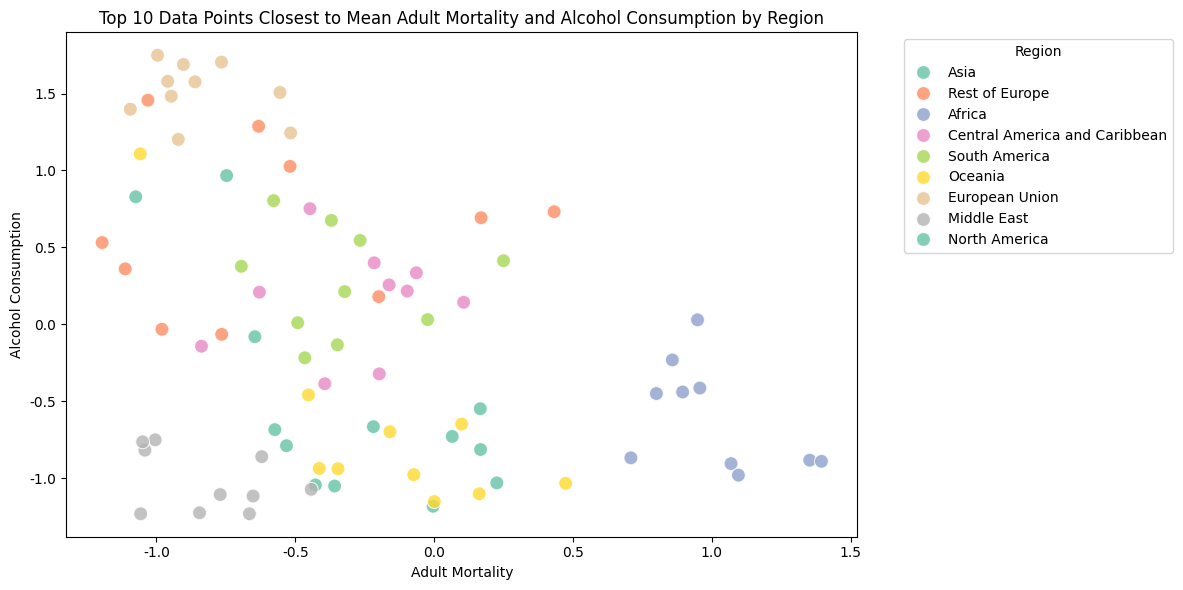

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 각 대륙별로 평균 계산
region_means = new_scaled_df.groupby('Region')[['Adult_mortality', 'Alcohol_consumption']].mean()

# 각 데이터의 평균에 대한 차이 계산
def closest_to_mean(region, row):
    mean_values = region_means.loc[region]
    # Adult_mortality와 Alcohol_consumption의 차이의 제곱 합
    return np.sqrt((row['Adult_mortality'] - mean_values['Adult_mortality'])**2 + 
                   (row['Alcohol_consumption'] - mean_values['Alcohol_consumption'])**2)

# 각 대륙별로 평균에 가장 가까운 10개 데이터 선택
selected_data = []
for region in new_scaled_df['Region'].unique():
    region_data = new_scaled_df[new_scaled_df['Region'] == region]
    region_data['distance_to_mean'] = region_data.apply(lambda row: closest_to_mean(region, row), axis=1)
    
    # 평균에 가장 가까운 10개 데이터 선택
    closest_10 = region_data.nsmallest(10, 'distance_to_mean')
    selected_data.append(closest_10)

# 선택된 데이터들을 하나의 DataFrame으로 결합
selected_data_df = pd.concat(selected_data)

# 산점도 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Adult_mortality', y='Alcohol_consumption', hue='Region', data=selected_data_df, palette='Set2', s=100, alpha=0.8)

# 그래프 제목과 레이블 설정
plt.title('Top 10 Data Points Closest to Mean Adult Mortality and Alcohol Consumption by Region')
plt.xlabel('Adult Mortality')
plt.ylabel('Alcohol Consumption')

# 범례 설정
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


- 봐도 모르겠다 대륙별로 나눠보자
- 대륙별로 나누니까 이번엔 모든 데이터를 활용해보자

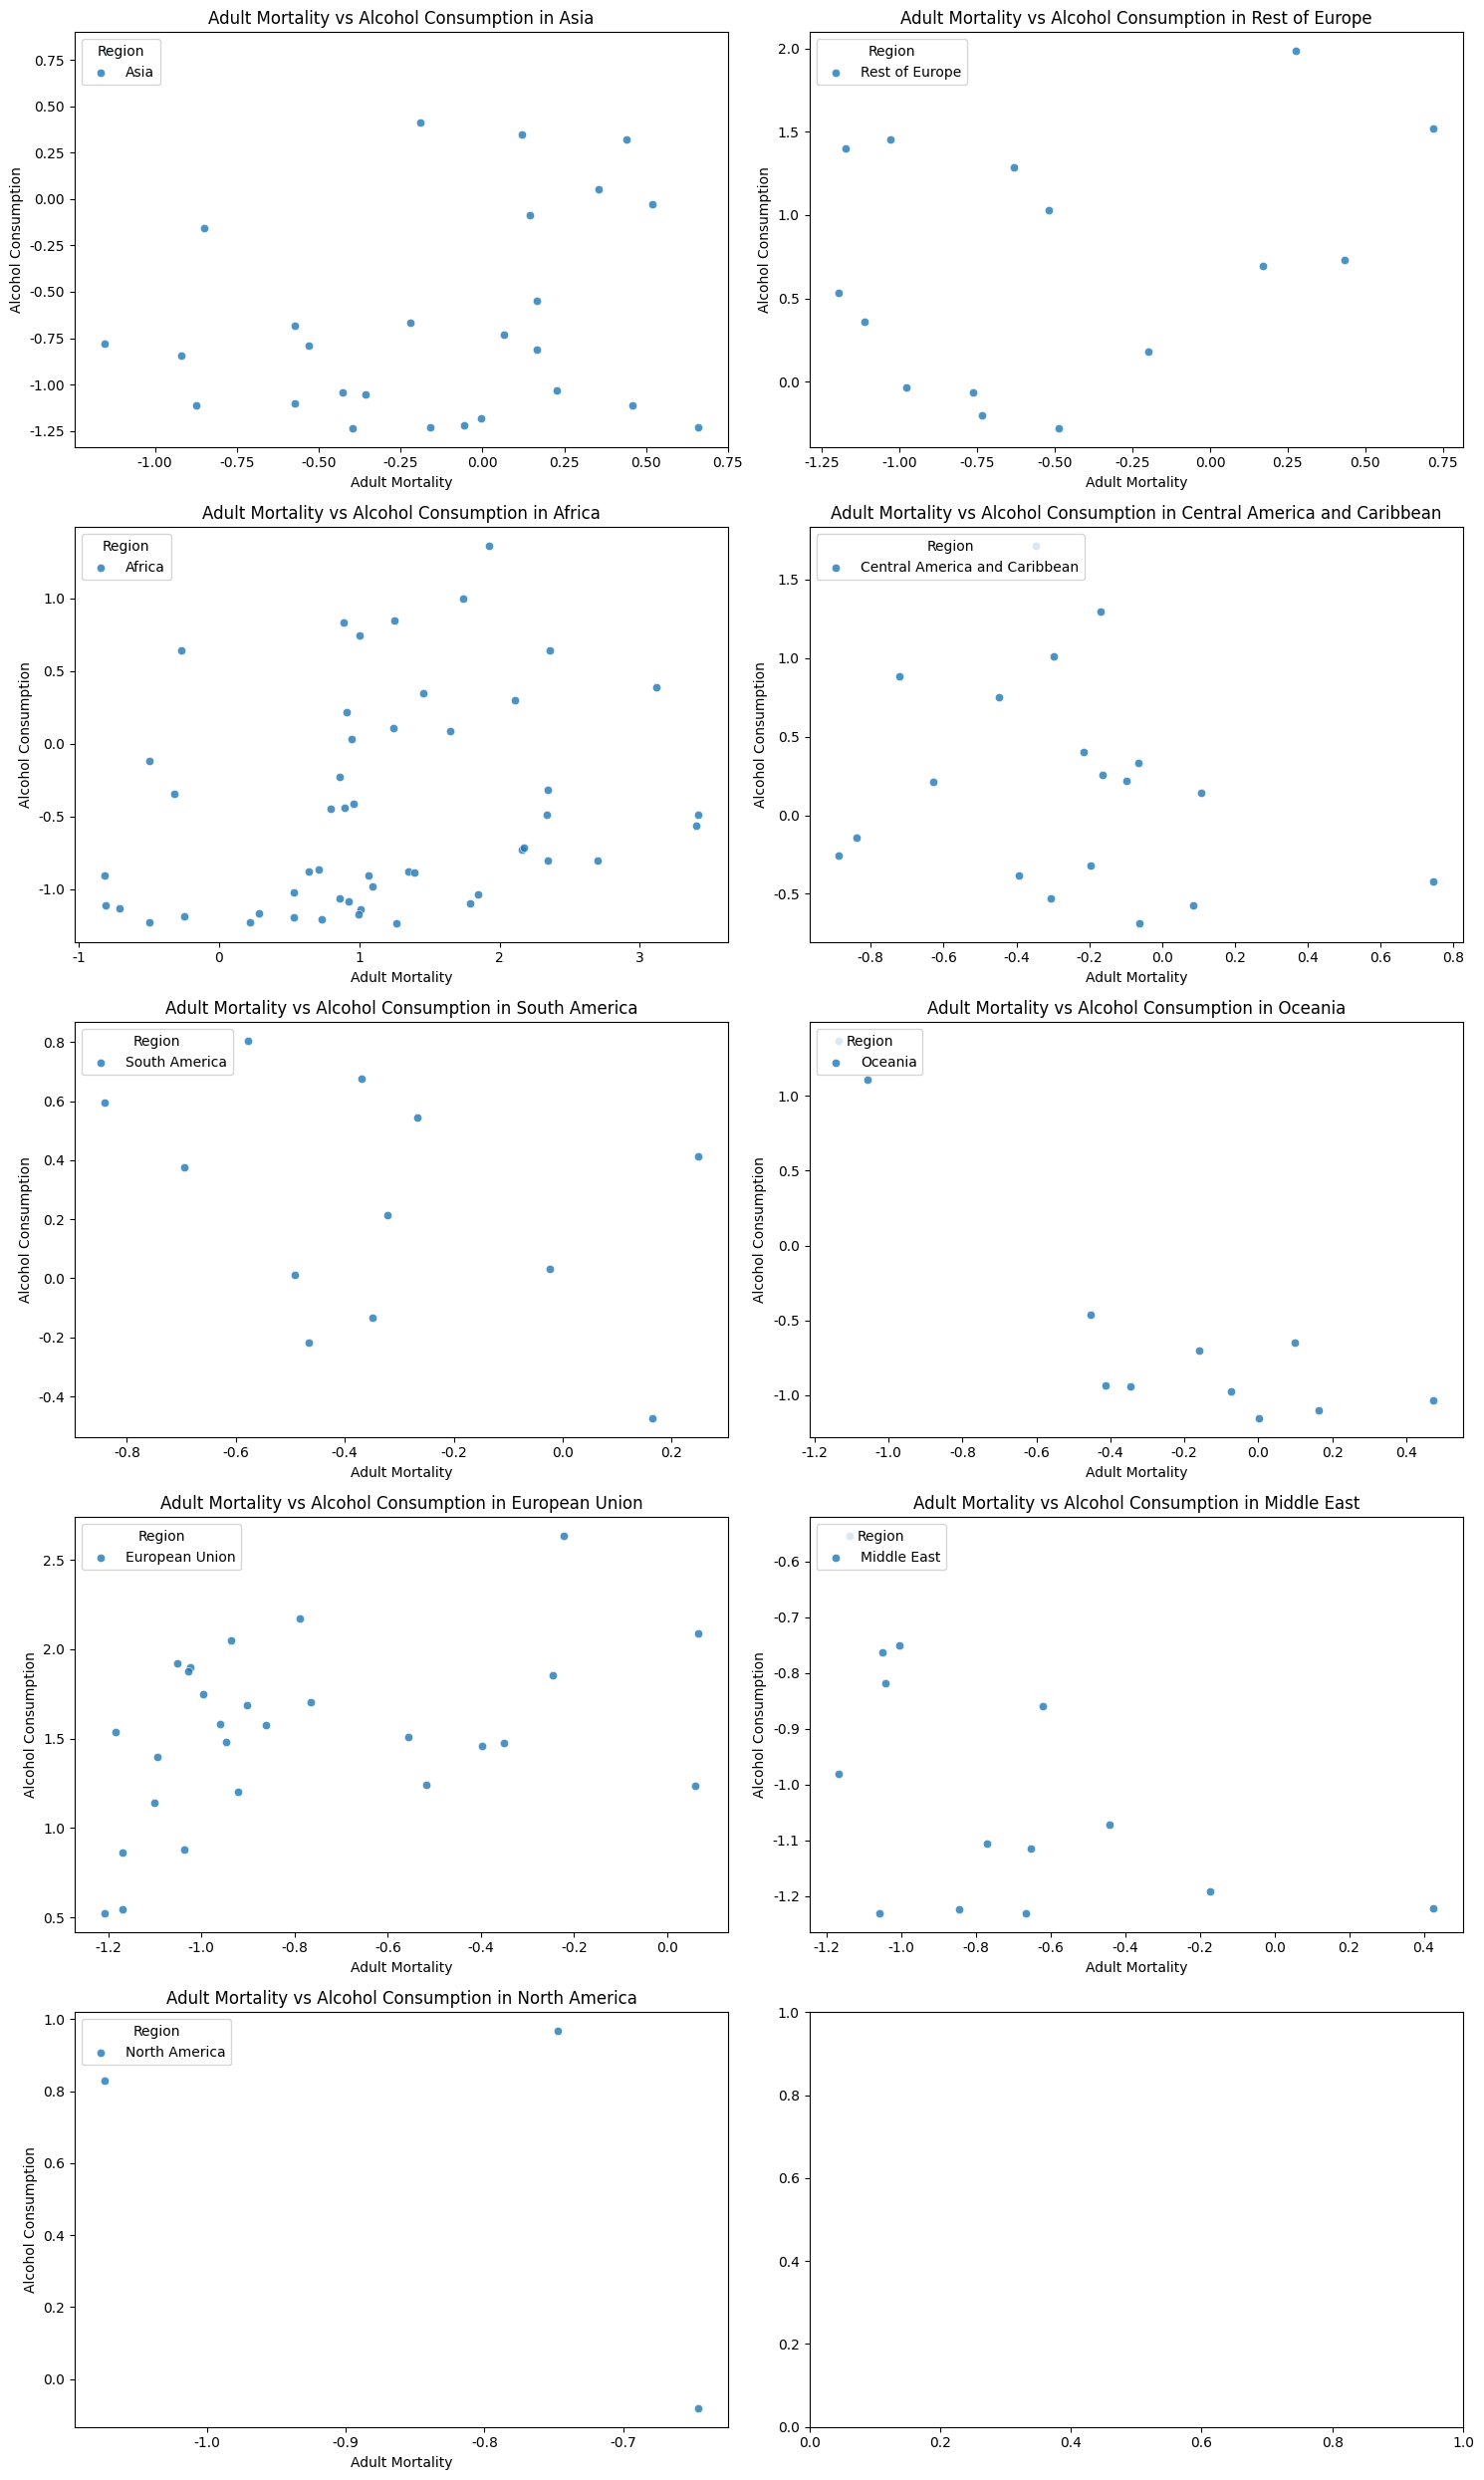

In [44]:

# 대륙별로 subplot을 생성
num_regions = len(new_scaled_df['Region'].unique())
fig, axes = plt.subplots(nrows=(num_regions + 1) // 2, ncols=2, figsize=(15, 5 * ((num_regions + 1) // 2)))

# 각 대륙에 대해 그래프 생성
for i, region in enumerate(new_scaled_df['Region'].unique()):
    ax = axes[i // 2, i % 2] if num_regions > 1 else axes  # 대륙에 맞게 서브플롯 선택
    region_data = new_scaled_df[new_scaled_df['Region'] == region]
    
    sns.scatterplot(x='Adult_mortality', y='Alcohol_consumption', data=region_data, ax=ax, label=region, alpha=0.8)
    ax.set_title(f"Adult Mortality vs Alcohol Consumption in {region}")
    ax.set_xlabel('Adult Mortality')
    ax.set_ylabel('Alcohol Consumption')
    ax.legend(title='Region', loc='upper left')

# 그래프 간 레이아웃 조정
plt.tight_layout()
plt.show()


- 나누어보니 산포도가 너무 흩어져있어 비교가 불가능할것 같다.